# Distribution of Secretory Index, Clustering and Correlation analysis

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
import squarify 

#### Loading samples and secretory index

In [3]:
genes=np.load("genes_tpm_v11_clean_noutliers.npy",allow_pickle=True)
samples=np.load("samples_tpm_v11_clean_noutliers.npy",allow_pickle=True)
X=np.load("results_tpm_v11_clean_noutliers.npy",allow_pickle=True)
results=pd.DataFrame(X,index=genes,columns=samples)

In [4]:
results.head()

,GSM741172,GSM741170,GSM741171,GSM907015,GSM1193921,GSM1098188,GSM1193928,GSM1048186,GSM1216828,GSM1241249,...,GSM5572862,GSM5577332,GSM5577333,GSM5577334,GSM5577335,GSM5577336,GSM5577337,GSM5580099,GSM5580100,GSM5580102
A1BG,1.514984,1.316501,0.945544,12.863701,71.141045,0.738105,134.292114,10.272301,2.855723,0.000000,...,0.778685,6.074946,6.227352,5.103860,8.809099,7.493229,7.746690,42.761230,35.295048,35.235378
A1CF,0.208822,0.199274,0.138544,0.058604,0.301775,0.034464,1.374310,0.267306,13.903001,0.000000,...,0.163493,0.129097,0.266828,0.162259,0.165147,0.261044,0.246418,0.013703,0.031029,0.020903
A2M,61.154045,141.594360,62.881958,109.156868,0.000000,313.137146,0.000000,216.393066,22.510412,0.000000,...,0.000000,0.130720,0.426572,0.000000,0.507422,0.200596,0.000000,314.406342,426.812805,311.372803
A2ML1,0.373835,0.262869,0.266668,0.799892,0.655797,0.109945,0.366945,4.065595,0.190527,1.748747,...,0.112173,1.403640,2.326312,2.850472,3.334096,3.415315,2.629406,0.064991,0.255675,0.041696
A3GALT2,0.722773,1.094620,0.645631,0.000000,0.000000,0.458957,0.000000,4.969500,0.000000,0.000000,...,0.000000,0.457722,0.104935,0.179656,0.000000,0.313955,0.304647,0.000000,0.000000,0.151392


In [5]:
secretome_included=(pd.read_csv("secretome_included_V11.csv",header=None))[0].tolist()

In [6]:
secretome_results=results.loc[secretome_included].T

In [7]:
secretome_results

,SERPINB5,IGHV6-1,CGB3,WNT7A,DEFB126,ARSI,RETN,NPPC,SCGB2A1,HHIPL1,...,ADIPOQ,CRISPLD2,VEGFB,C4orf48,IGLL1,SERPINF1,VSTM2L,CXCL11,TRH,IGHV2-26
GSM741172,113.964882,0.000000,0.057041,0.019423,0.0,0.692760,0.000000,0.000000,0.000000,0.202602,...,0.146663,3.850780,108.755249,41.392681,0.0,5.204968,0.137873,0.120231,0.000000,0.0
GSM741170,81.673691,0.000000,0.062353,0.000000,0.0,1.036111,0.000000,0.000000,0.069487,0.242965,...,0.122890,2.293016,119.608902,37.620197,0.0,6.944385,0.148467,0.000000,0.000000,0.0
GSM741171,129.720703,0.000000,0.000000,0.011451,0.0,1.016365,0.000000,0.000000,0.000000,0.184163,...,0.094487,2.780658,109.532761,45.591480,0.0,4.300973,0.238004,0.076848,0.000000,0.0
GSM907015,0.094856,0.000000,0.429608,0.000000,0.0,0.140717,4.593505,0.000000,0.000000,0.235366,...,0.080517,15.120157,80.168198,3.197120,0.0,6.824530,0.058339,23.649099,0.073621,0.0
GSM1193921,1.187640,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.054002,...,0.360102,7.861645,465.232605,553.848145,0.0,10.783781,4.272276,2.023030,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM5577336,0.246595,0.000000,2.184520,0.399760,0.0,0.059732,0.000000,0.539346,0.000000,0.711564,...,1.252528,23.166712,48.127388,9.047230,0.0,16.400606,0.334705,0.149466,0.049399,0.0
GSM5577337,0.000000,0.000000,0.939745,0.116968,0.0,0.103378,0.000000,0.295014,0.000000,0.610836,...,0.739229,26.172136,40.292740,24.467190,0.0,12.922050,0.633201,0.000000,0.000000,0.0
GSM5580099,0.000000,0.264284,0.000000,0.016138,0.0,0.000000,219.092072,0.000000,0.000000,0.287444,...,0.046117,0.563054,133.549988,41.443790,0.0,81.109077,0.000000,0.435168,0.000000,0.0
GSM5580100,0.273744,0.000000,0.149047,0.018079,0.0,0.000000,282.379333,0.000000,0.000000,0.259062,...,0.016225,0.596136,115.019005,30.883366,0.0,96.948517,0.000000,0.484154,0.000000,0.0


Loading the secretory index

In [8]:
sample_types=pd.read_csv("si_percentage_ctype_no_outliers.csv",index_col=0)
#sample_types.columns=["sample","percentage","cell_type"]

In [9]:
sample_types.head()

,percentage,cell_type,SI
GSM741172,4.511082,HELA,451.10822
GSM741170,4.583831,HELA,458.38312
GSM741171,4.867313,HELA,486.73132
GSM907015,14.701528,Macrophage,1470.15270
GSM1193921,2.805667,MDAMB231,280.56670


In [10]:
order=sample_types.groupby("cell_type").median().sort_values(by="percentage",ascending=False).index.values

In [11]:
len(samples)

62571

In [12]:
secretome_results.set_index(sample_types["cell_type"].values,inplace=True)

In [13]:
cluster_df=secretome_results.groupby(secretome_results.index).median()

In [14]:
sorted_cluster=cluster_df.reindex(order)

In [15]:
sorted_cluster

,SERPINB5,IGHV6-1,CGB3,WNT7A,DEFB126,ARSI,RETN,NPPC,SCGB2A1,HHIPL1,...,ADIPOQ,CRISPLD2,VEGFB,C4orf48,IGLL1,SERPINF1,VSTM2L,CXCL11,TRH,IGHV2-26
Plasma Cell,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.155264,1.222405,0.000000,0.000000,0.000000,2.649700,0.000000,0.000000,0.000000,0.0
Pancreatic Islet,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.936600,0.000000,...,0.000000,0.751985,0.000000,11.624849,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Chondrocyte,0.000000,0.0,0.000000,0.000000,0.000000,2.884188,0.000000,0.000000,0.000000,10.230740,...,0.127933,14.811482,63.121193,5.663900,0.000000,29.850685,0.130042,0.000000,0.070745,0.0
Hepatocyte,0.040780,0.0,0.000000,0.032063,0.000000,0.181056,0.000000,0.000000,0.145857,0.278105,...,0.077387,1.532374,20.456734,8.197950,0.000000,282.513489,3.644095,0.178425,0.000000,0.0
Alpha Cell,0.452712,0.0,0.000000,0.148363,0.000000,0.039910,0.000000,0.080679,81.222702,0.829673,...,1.133709,8.616991,70.149773,39.902401,0.469031,14.350594,7.101620,0.000000,0.046000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HEK293,0.005697,0.0,0.260485,0.017474,0.000000,0.021214,0.000000,4.812110,0.000000,0.075706,...,0.138042,1.190786,35.761879,28.564938,0.000000,38.933945,1.025930,0.000000,0.000000,0.0
FLPIN TREX 293,0.105693,0.0,0.532880,0.021959,0.092816,0.006924,0.000000,5.919270,0.000000,0.083596,...,0.167360,1.748071,33.807819,13.165500,0.000000,12.057649,0.808578,0.074268,0.022361,0.0
IMR32,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.428496,15.572160,6.519730,0.000000,43.467052,0.000000,0.000000,0.000000,0.0
K562,0.122347,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120914,...,0.121166,0.870156,46.212399,9.411279,0.000000,45.171371,0.000000,1.544620,0.000000,0.0


In [82]:
#select top secretory genes expressed in all cell types
top_genes=[]
for cell in cluster_df.index.values:
    top_genes.extend(pd.Series.sort_values(sorted_cluster.loc[cell],ascending=False)[0:5].index.values)

In [83]:
len(set(top_genes))

91

In [84]:
sorted_cluster.T.loc[set(top_genes)]

,Plasma Cell,Pancreatic Islet,Chondrocyte,Hepatocyte,Alpha Cell,Beta Cell,Osteoblast,Hepatic Stellate Cell,NHBE,Macrophage,...,JURKAT,LNCAP,Neuron,RKO,293F,HEK293,FLPIN TREX 293,IMR32,K562,Thymocyte
NAMPT,36.922020,13.849540,106.945732,171.110382,41.788647,54.037617,37.933537,49.775539,146.523575,213.164185,...,36.300400,105.488220,16.715691,95.960922,84.036118,76.854004,102.768929,6.199219,117.865662,4.518496
IL1RAP,3.161548,1.479205,11.166799,22.626053,47.142834,8.762243,13.225215,9.626681,27.413567,9.194874,...,5.530606,7.418355,3.540570,4.630798,4.802194,6.211018,6.355636,0.136814,7.341371,1.548080
OOSP1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.090217,0.000000,0.043857,0.000000,0.399821,0.000000
IGLC7,1.207710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LYZ,0.000000,0.000000,0.589708,3.786545,2.813760,10.581350,0.132310,0.056959,0.490907,2156.619629,...,0.000000,0.215959,0.054298,0.110926,0.284111,0.225490,0.297008,9.374440,27.638670,2.820190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ITM2B,31.178556,492.806519,1275.359131,494.042694,376.501190,333.278351,530.847778,616.833557,1049.547485,780.607910,...,237.185181,242.327423,118.661545,140.807007,178.996658,175.041718,215.740524,37.453201,59.600754,53.558620
INS,0.000000,1298.255371,0.000000,0.000000,1006.122192,43284.476562,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SPARC,0.000000,0.000000,6060.215820,54.348953,3.883460,20.613525,14441.889648,9322.237305,52.405930,203.691376,...,3.069213,0.292419,84.650803,0.016465,224.040955,14.873551,2.139307,8.488720,17.947395,1.269030
NUCB2,88.008621,187.052353,453.149506,70.743942,142.834351,146.770203,147.979156,139.723007,76.357224,47.748528,...,780.263733,183.485489,55.699890,59.021820,68.338211,89.001823,75.361855,22.091755,78.605217,398.403381


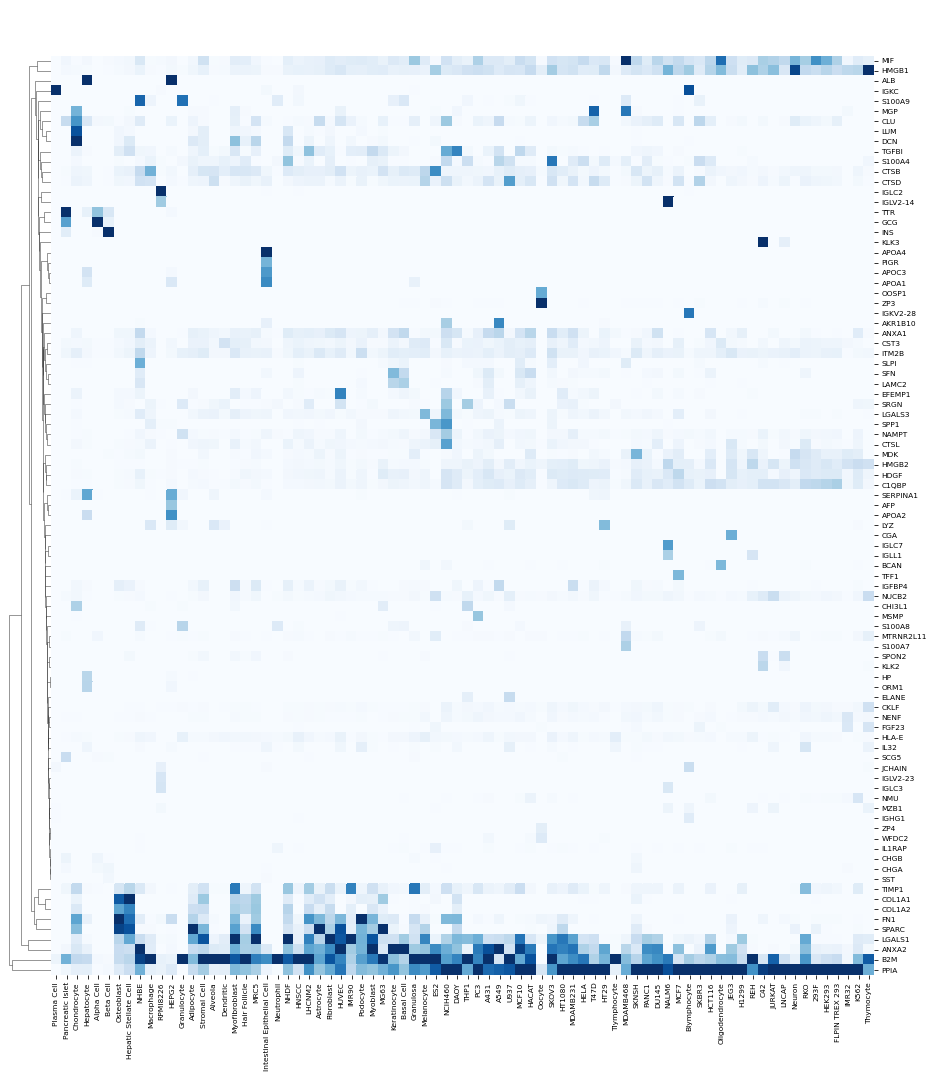

In [89]:
## clustermap standard scaling was disabled to allow visual inspection of the relative expression across cell types
plt.rcParams.update({'font.size': 7.5})
sns.clustermap(sorted_cluster.T.loc[set(top_genes)],figsize=(13,15),cmap="Blues",
               dendrogram_ratio=(0.05,0.05),standard_scale=1,cbar_pos=None,
               metric="euclidean",col_cluster=False,row_cluster=True,method="weighted"
              
              )
plt.savefig("cluster_secretome_ordered.svg",bbox_inches="tight")

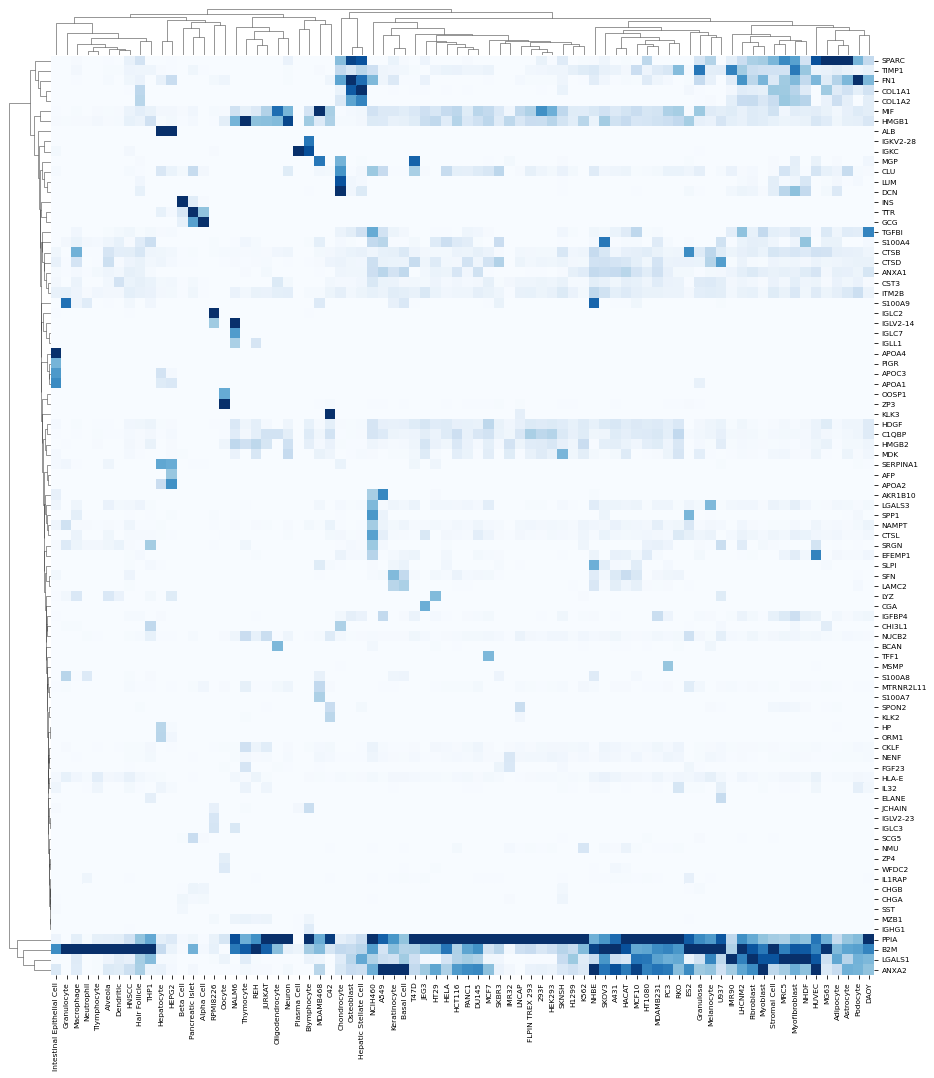

In [90]:
plt.rcParams.update({'font.size': 7.5})
sns.clustermap(sorted_cluster.T.loc[set(top_genes)],figsize=(13,15),cmap="Blues",
               dendrogram_ratio=(0.05,0.05),standard_scale=1,cbar_pos=None,
               metric="euclidean",method="complete"
              
              )


In [91]:
si=pd.read_csv("si_V11_TPM_noutliers.csv",index_col=0)
si.columns=["cell_type","secreted"]

In [92]:
si.head()

,cell_type,secreted
GSM741172,HELA,451
GSM741170,HELA,458
GSM741171,HELA,486
GSM907015,Macrophage,1470
GSM1193921,MDAMB231,280


In [93]:
si=si.loc[results.columns]

In [952]:
si

,cell_type,secreted
GSM741172,HELA,451
GSM741170,HELA,458
GSM741171,HELA,486
GSM907015,Macrophage,1470
GSM1193921,MDAMB231,280
...,...,...
GSM5577336,HUVEC,533
GSM5577337,HUVEC,535
GSM5580099,Macrophage,1309
GSM5580100,Macrophage,1300


In [1054]:
def gene_cor(gene):
    dataframe=pd.DataFrame(np.nan,index=results.columns, columns=["geneX","secre_score"])
    dataframe["secre_score"]=si.secreted
    dataframe["geneX"]=results.loc[gene]
    dataframe["logGene"]=np.log10(dataframe.geneX+1)
    dataframe["logScore"]=np.log10(dataframe["secre_score"]+1)

    g=sns.lmplot(x="secre_score",y="logGene",data=dataframe,fit_reg=False)
    #g=sns.lmplot(x="logScore",y="logGene",data=dataframe,fit_reg=False)
    spearman, pval=scipy.stats.spearmanr(results.loc[gene], si.secreted)
    #pval=scipy.stats.pearsonr(results.loc[gene], si.secreted)[1]
    #g.set(xlabel="log10 secretory score",ylabel="log10 Gene counts",title=(gene+" r= %.2f"%spearman+" pval=%.2f"%pval))
    g.set(xlabel="secretory score",ylabel="log10 Gene counts",title=(gene+" \u03C1= %.2f"%spearman+" pval=%.2f"%pval))

In [95]:
import scipy.stats

In [96]:
scipy.stats.spearmanr(results.loc["PPIA"], si.secreted)[0]

-0.31093262182591125

In [963]:
max_expression=results.sum(axis=1)

In [965]:
max_expression.sort_values()

MIR4485            0.000000e+00
KIR3DL1-205        1.082435e+00
AC005042.1         1.497200e+00
ENSG00000274971    1.200578e+01
AL162426.1         1.342787e+01
                       ...     
INS                6.876598e+08
MT-CO1             6.996364e+08
MT-CO3             7.101984e+08
GCG                7.972423e+08
MT-CO2             9.264257e+08
Length: 20842, dtype: float32

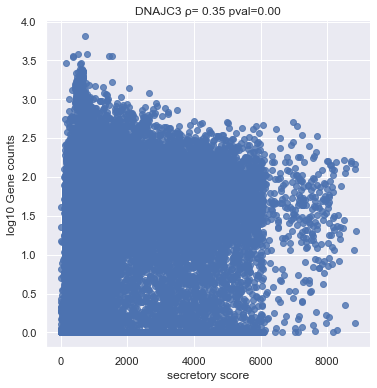

In [1055]:
gene_cor("DNAJC3")

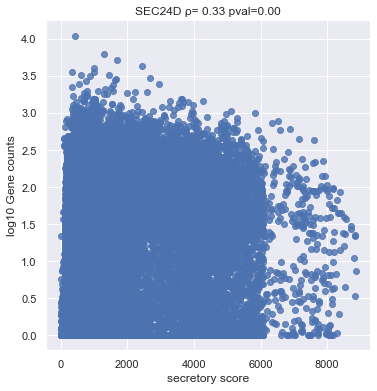

In [1056]:
gene_cor("SEC24D")

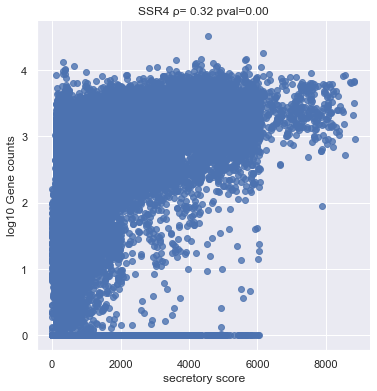

In [1057]:
gene_cor("SSR4")

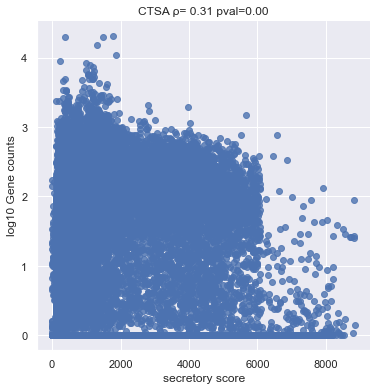

In [1058]:
gene_cor("CTSA")

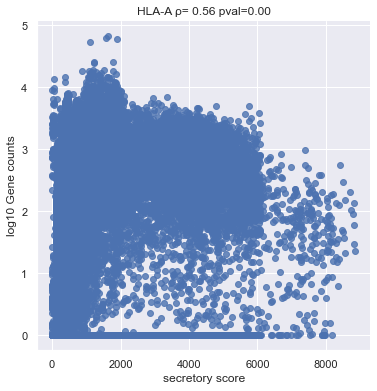

In [1059]:
gene_cor("HLA-A")

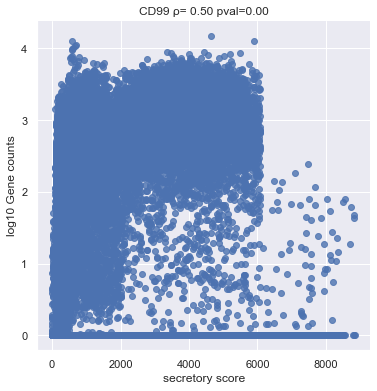

In [1060]:
gene_cor("CD99")

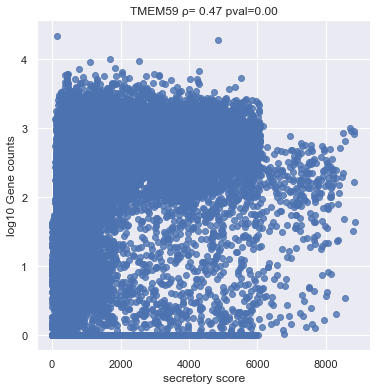

In [1061]:
gene_cor("TMEM59")

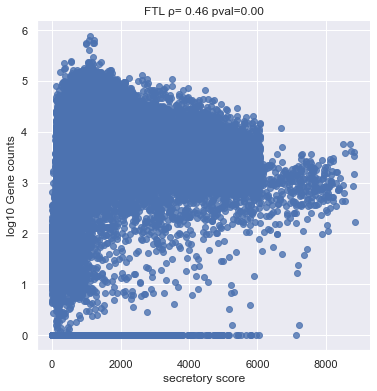

In [1062]:
gene_cor("FTL")

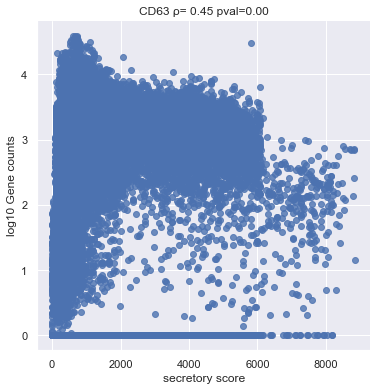

In [1063]:
gene_cor("CD63")

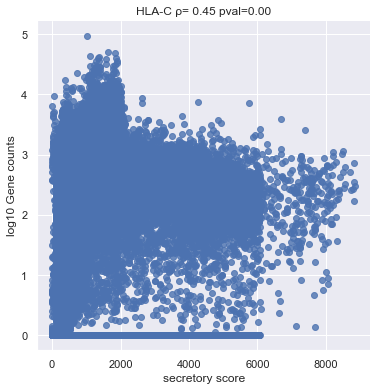

In [1064]:
gene_cor("HLA-C")

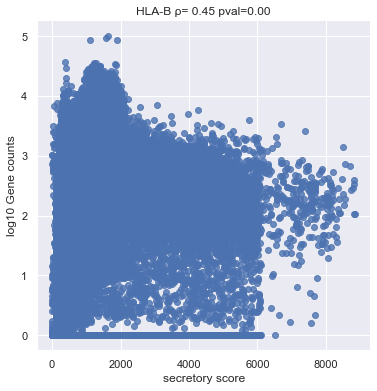

In [1065]:
gene_cor("HLA-B")

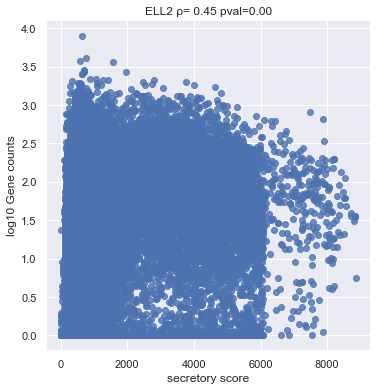

In [1066]:
gene_cor("ELL2")

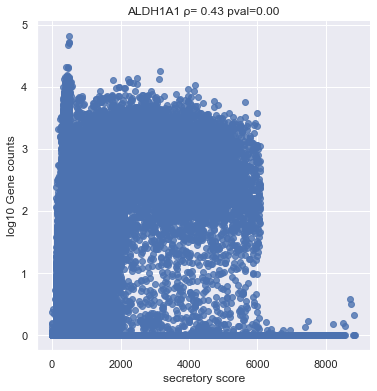

In [1067]:
gene_cor("ALDH1A1")

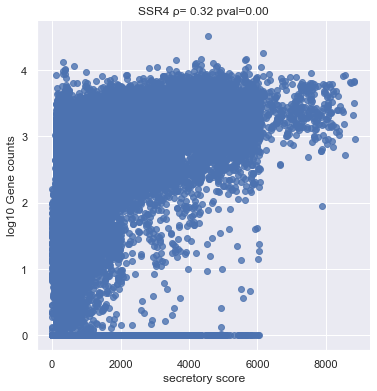

In [1068]:
gene_cor("SSR4")

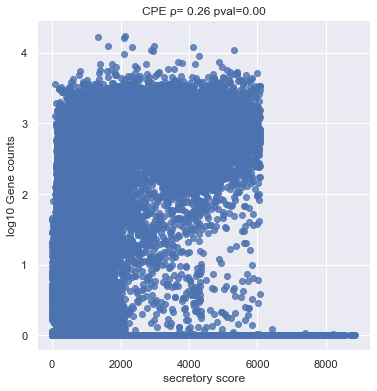

In [1069]:
gene_cor("CPE")

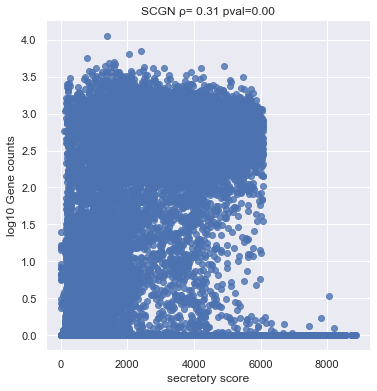

In [1070]:
gene_cor("SCGN")

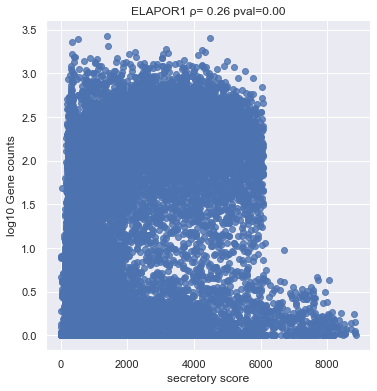

In [1071]:
gene_cor("ELAPOR1")

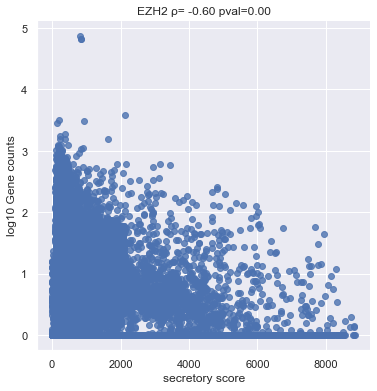

In [1072]:
gene_cor("EZH2")

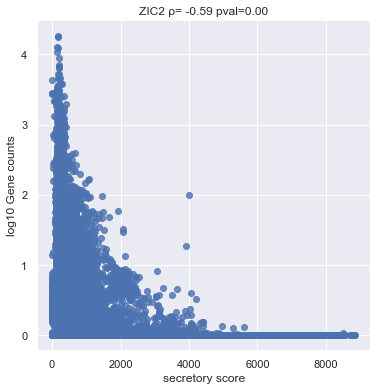

In [1073]:
gene_cor("ZIC2")

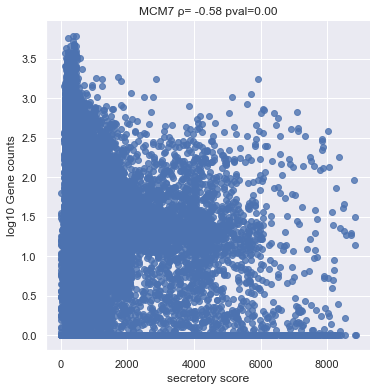

In [1074]:
gene_cor("MCM7")

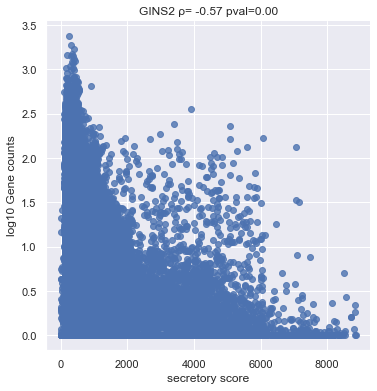

In [1075]:
gene_cor("GINS2")

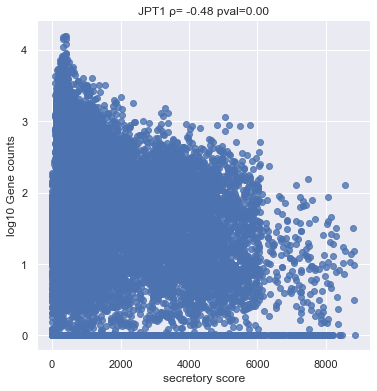

In [1076]:
gene_cor("JPT1")

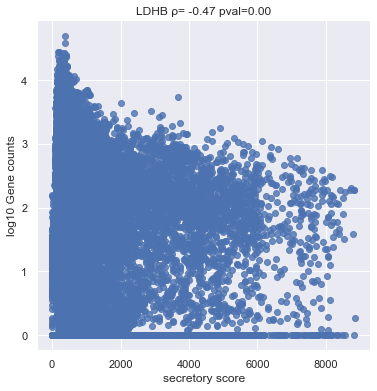

In [1077]:
gene_cor("LDHB")

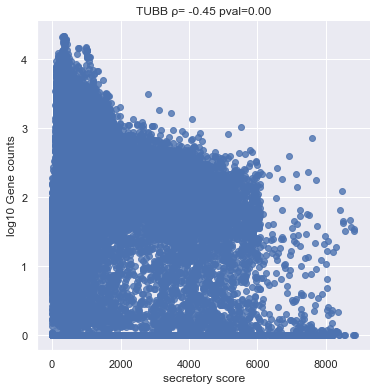

In [1078]:
gene_cor("TUBB")

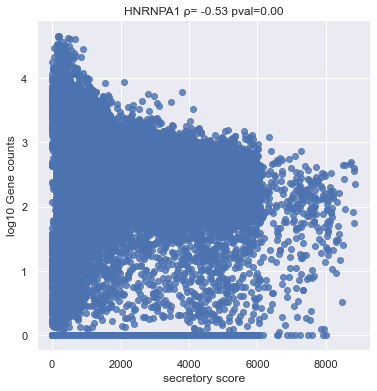

In [1080]:
gene_cor("HNRNPA1")

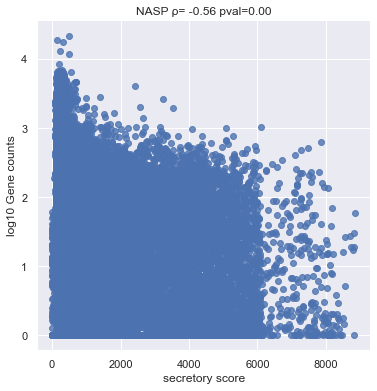

In [1081]:
gene_cor("NASP")

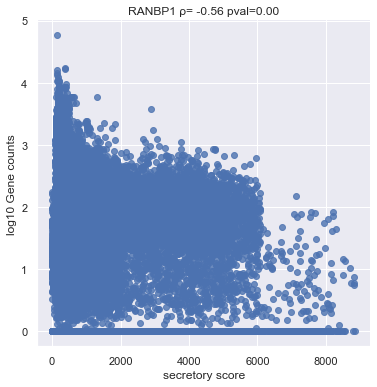

In [1082]:
gene_cor("RANBP1")

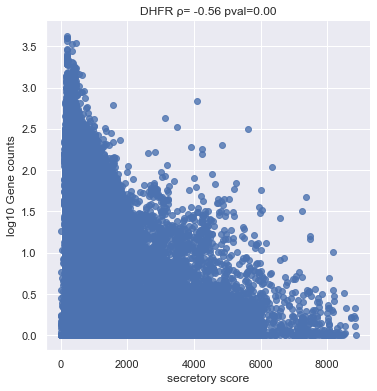

In [1083]:
gene_cor("DHFR")

### importing list of secretory pathways genes

In [99]:
secre_path=pd.read_excel("../EV1.xlsx",header=1)

In [100]:
secre_path=secre_path[["NAME","Subsystem"]]

In [101]:
secre_path.groupby(by="Subsystem").count()

,NAME
Subsystem,
Dolichol pathway,16
ER calcium homeostasis,5
ER glycosylation,15
ER to Golgi Trafficking,40
ERAD,51
ERADC,12
ERADL/M,5
GPI biosynthesis,23
Golgi glycosylation,52


In [102]:
drop=[]
for gene in secre_path["NAME"]:
    if gene not in results.index:
        drop.append(gene)
    

In [103]:
drop

['ALG1L', 'CASP12', 'UFD']

In [104]:
secre_path.set_index("NAME",drop=False,inplace=True)

In [105]:
secre_path.shape

(595, 2)

In [106]:
secre_path.drop(labels=drop,axis=0,inplace=True)

In [107]:
secre_path.shape

(592, 2)

In [108]:
secre_genes=secre_path.index.values

In [109]:
subset_secretory=results.loc[secre_genes].T

In [110]:
subset_secretory

,ALG1,ALG10B,ALG11,ALG12,ALG13,ALG14,ALG1L2,ALG2,ALG5,ALG6,...,MAPK10,MAPK8,MAPK9,MBTPS1,MBTPS2,NFE2L2,PPP1R15A,PREB,TRAF2,XBP1
GSM741172,67.555008,6.754457,11.374541,32.059319,56.900768,7.436840,1.205118,25.693741,33.438507,11.668765,...,0.209219,21.511696,55.261112,51.254818,20.386301,80.102119,10.551440,32.145775,73.250923,66.630089
GSM741170,58.676785,8.125086,10.603242,30.204660,58.122894,11.446000,1.055281,22.420101,32.350353,14.161101,...,0.315566,23.526163,45.746853,62.505806,19.104986,86.897011,8.306351,34.846386,59.389065,57.257416
GSM741171,77.423752,5.312899,9.868777,33.855591,53.257854,5.334246,0.664633,27.929470,39.251011,11.807830,...,0.292115,19.528742,44.941437,45.789162,18.189554,62.453072,16.441891,28.370804,52.725353,78.502525
GSM907015,7.861546,3.562702,10.940756,12.762840,35.285229,7.069565,0.242174,26.756710,29.595095,10.645739,...,0.000000,26.378620,25.315340,30.045597,5.406755,123.627502,209.129410,20.785776,9.757392,158.151520
GSM1193921,604.402527,54.733994,105.467453,339.503326,426.594818,104.526321,0.000000,476.018433,538.408203,158.996017,...,0.000000,1384.837158,717.725830,551.787598,122.882416,1018.086914,612.483093,546.744019,308.626251,529.727112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM5577336,36.294746,6.787030,37.812576,9.434669,222.578445,15.872779,4.470778,39.666206,15.514875,17.130608,...,83.478462,34.680813,28.692894,104.315651,11.956158,107.804199,200.303085,36.801472,47.506702,77.232246
GSM5577337,44.331917,6.450800,40.464794,9.331850,232.045959,14.088659,4.024300,40.700340,17.083889,12.259092,...,54.210907,34.931522,31.175795,101.792427,13.215544,110.711090,191.407593,33.865967,30.734161,94.087440
GSM5580099,27.609259,2.768197,11.299513,14.918550,35.161087,4.679030,0.951821,26.687531,32.309021,6.791517,...,0.827059,9.852377,41.377640,48.938580,8.192971,107.217911,40.094120,46.359692,13.081557,107.701347
GSM5580100,28.271667,6.120058,10.327983,15.936593,33.098907,3.506677,1.991493,24.912334,36.671593,5.042555,...,0.000000,15.683266,44.184311,48.737541,8.283486,92.874809,32.454117,51.437748,18.134790,146.917053


In [111]:
subset_secretory.to_csv("secretory_pathway_expression.csv")

In [112]:
subset_secretory.set_index(sample_types["cell_type"].values,inplace=True)

In [113]:
subset_secretory

,ALG1,ALG10B,ALG11,ALG12,ALG13,ALG14,ALG1L2,ALG2,ALG5,ALG6,...,MAPK10,MAPK8,MAPK9,MBTPS1,MBTPS2,NFE2L2,PPP1R15A,PREB,TRAF2,XBP1
HELA,67.555008,6.754457,11.374541,32.059319,56.900768,7.436840,1.205118,25.693741,33.438507,11.668765,...,0.209219,21.511696,55.261112,51.254818,20.386301,80.102119,10.551440,32.145775,73.250923,66.630089
HELA,58.676785,8.125086,10.603242,30.204660,58.122894,11.446000,1.055281,22.420101,32.350353,14.161101,...,0.315566,23.526163,45.746853,62.505806,19.104986,86.897011,8.306351,34.846386,59.389065,57.257416
HELA,77.423752,5.312899,9.868777,33.855591,53.257854,5.334246,0.664633,27.929470,39.251011,11.807830,...,0.292115,19.528742,44.941437,45.789162,18.189554,62.453072,16.441891,28.370804,52.725353,78.502525
Macrophage,7.861546,3.562702,10.940756,12.762840,35.285229,7.069565,0.242174,26.756710,29.595095,10.645739,...,0.000000,26.378620,25.315340,30.045597,5.406755,123.627502,209.129410,20.785776,9.757392,158.151520
MDAMB231,604.402527,54.733994,105.467453,339.503326,426.594818,104.526321,0.000000,476.018433,538.408203,158.996017,...,0.000000,1384.837158,717.725830,551.787598,122.882416,1018.086914,612.483093,546.744019,308.626251,529.727112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HUVEC,36.294746,6.787030,37.812576,9.434669,222.578445,15.872779,4.470778,39.666206,15.514875,17.130608,...,83.478462,34.680813,28.692894,104.315651,11.956158,107.804199,200.303085,36.801472,47.506702,77.232246
HUVEC,44.331917,6.450800,40.464794,9.331850,232.045959,14.088659,4.024300,40.700340,17.083889,12.259092,...,54.210907,34.931522,31.175795,101.792427,13.215544,110.711090,191.407593,33.865967,30.734161,94.087440
Macrophage,27.609259,2.768197,11.299513,14.918550,35.161087,4.679030,0.951821,26.687531,32.309021,6.791517,...,0.827059,9.852377,41.377640,48.938580,8.192971,107.217911,40.094120,46.359692,13.081557,107.701347
Macrophage,28.271667,6.120058,10.327983,15.936593,33.098907,3.506677,1.991493,24.912334,36.671593,5.042555,...,0.000000,15.683266,44.184311,48.737541,8.283486,92.874809,32.454117,51.437748,18.134790,146.917053


In [114]:
cluster_secretory=subset_secretory.groupby(subset_secretory.index).median()

In [115]:
cluster_secretory

,ALG1,ALG10B,ALG11,ALG12,ALG13,ALG14,ALG1L2,ALG2,ALG5,ALG6,...,MAPK10,MAPK8,MAPK9,MBTPS1,MBTPS2,NFE2L2,PPP1R15A,PREB,TRAF2,XBP1
293F,28.991913,7.923062,9.317178,26.485306,45.451962,10.506519,0.509062,19.753036,39.547104,19.123686,...,1.182560,40.045845,51.093964,62.616177,17.908356,36.531189,41.996986,77.829544,33.248276,94.776779
A431,16.113337,7.084829,7.498219,16.626585,56.867027,7.533665,0.774164,24.271324,30.287209,12.813482,...,4.928722,66.396088,51.583160,65.823181,13.290688,72.170647,36.491325,48.054222,20.360882,104.758560
A549,32.139160,4.890795,7.369290,12.350696,53.055042,7.158440,0.451282,29.368610,31.654972,8.807158,...,1.395664,29.661949,43.749123,53.626907,21.947830,67.718895,31.516289,50.099838,36.284645,60.471256
Adipocyte,23.375061,2.704122,11.995993,14.962911,27.836405,9.376130,0.877260,30.208582,44.789700,8.335107,...,11.421149,29.655804,31.475843,63.753517,10.409781,68.281639,38.874306,50.056499,6.872450,101.602493
Alpha Cell,7.933360,3.250562,23.636290,6.318950,92.917000,11.080100,4.618892,17.858070,24.816681,7.018074,...,88.491127,35.513702,41.549831,51.198326,7.579690,96.578033,49.730427,12.187272,17.428841,86.467300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T47D,40.152054,11.330462,13.981677,15.341530,31.950712,7.175141,0.650358,21.391350,37.481201,16.814789,...,5.965135,34.394833,46.888390,150.176331,25.304119,59.980770,11.888949,38.892731,29.787514,985.214844
THP1,21.517096,2.514732,15.530570,7.833370,36.970001,5.333374,0.776732,18.282841,52.595768,8.043880,...,0.359839,15.621440,45.010654,38.689190,5.403409,111.903358,23.373367,60.454948,16.119364,87.802063
Thymocyte,19.318195,1.440110,11.070491,4.934172,7.074588,6.302230,3.219771,5.367442,26.217148,6.006010,...,0.000000,6.052305,9.982733,13.589270,1.661613,71.828354,3.782300,5.759573,2.865410,21.032875
Tlymphocyte,9.911126,3.555910,10.233929,11.823580,52.626846,4.026846,0.853075,15.900721,30.302731,10.571199,...,0.246247,30.395626,30.335638,54.827442,2.486140,78.631989,172.716049,22.906872,20.118895,157.024414


In [116]:
pd.Series.sort_values(cluster_secretory.loc["Plasma Cell"],ascending=False)

SSR4       2782.414307
HERPUD1    1372.573975
TXNDC5      518.287415
HSP90B1     461.253296
SPCS2       450.803772
              ...     
APPL2         0.000000
MGAT4B        0.000000
MGAT3         0.000000
COG6          0.000000
RAB37         0.000000
Name: Plasma Cell, Length: 592, dtype: float32

In [117]:
pd.Series.sort_values(cluster_secretory.loc["Pancreatic Islet"],ascending=False)

SSR4        1397.351562
HSP90AB1     673.441772
HSP90AA1     652.044556
SRP14        577.933960
SKP1         558.284546
               ...     
AP3M1          0.000000
AP1S2          0.000000
AP1S1          0.000000
AP1B1          0.000000
RAB37          0.000000
Name: Pancreatic Islet, Length: 592, dtype: float32

In [118]:
pd.Series.sort_values(cluster_secretory.loc["Hepatocyte"],ascending=False)

PPIA       1578.282959
P4HB       1244.958130
HSPA8      1093.960449
CALR        832.598328
HSP90B1     522.062866
              ...     
ATXN3L        0.000000
WDR38         0.000000
GALNTL5       0.000000
FAM71B        0.000000
UBQLN3        0.000000
Name: Hepatocyte, Length: 592, dtype: float32

In [119]:
pd.Series.sort_values(cluster_secretory.loc["HEK293"],ascending=False)

PPIA        2280.251465
HSPA8       1174.398926
HSP90AA1    1018.465027
HSP90AB1     873.522644
ATF4         642.369019
               ...     
AGR3           0.000000
AGR2           0.000000
PIGY           0.000000
ATXN3L         0.000000
CRYAA          0.000000
Name: HEK293, Length: 592, dtype: float32

In [120]:
sorted_cluster=cluster_secretory.reindex(order)

In [121]:
sorted_cluster.T.loc[secre_path[secre_path["Subsystem"]=="UPR"].index.values]

,Plasma Cell,Pancreatic Islet,Chondrocyte,Hepatocyte,Alpha Cell,Beta Cell,Osteoblast,Hepatic Stellate Cell,NHBE,Macrophage,...,JURKAT,LNCAP,Neuron,RKO,293F,HEK293,FLPIN TREX 293,IMR32,K562,Thymocyte
ATF4,104.152008,87.516647,423.506592,288.106964,116.114708,201.689560,429.132874,504.038055,296.128937,236.565720,...,374.930237,423.752594,235.455124,366.717041,516.164368,642.369019,545.604614,48.334099,303.763702,22.408308
ATF6,2.105015,0.881298,16.912138,13.552299,15.055901,15.329500,18.104900,17.644030,17.932549,17.523560,...,13.578550,14.806634,8.393080,23.431416,14.332251,15.222300,15.287700,7.901810,16.383900,5.876892
ATF6B,4.845220,3.221644,54.418304,35.506264,43.233112,37.635281,56.792747,65.556778,56.934189,51.953438,...,30.193558,19.833008,15.777772,59.177254,50.539131,44.234009,61.596828,14.790464,73.736389,27.435772
BCL2,5.942093,0.000000,6.263250,0.784246,0.471929,0.548694,1.208352,0.522053,0.479848,5.316066,...,2.772880,1.360721,0.377366,3.634174,3.863454,3.005784,6.569236,1.802842,0.313040,28.955902
DDIT3,4.634265,26.953850,44.217167,28.776096,25.493511,43.586235,68.200195,59.638287,19.216253,41.614353,...,15.655664,52.812664,12.791702,45.864986,30.956146,28.467209,24.914137,63.429688,90.566269,14.343502
EIF2AK1,4.750090,2.721830,72.616631,72.038162,41.085190,77.408447,63.036102,68.911240,63.751305,38.603951,...,81.063965,126.344589,57.209702,78.409286,79.068230,92.756859,81.754433,73.391098,129.769394,31.741400
EIF2AK2,2.336270,3.121076,27.845940,12.167712,22.261292,24.028820,26.539690,22.157467,15.557762,20.365967,...,11.069767,19.524967,9.616030,34.382668,20.013584,25.202877,26.619993,6.295820,14.953170,9.762249
EIF2AK3,18.424652,0.000000,21.737898,18.667255,29.695341,15.564399,14.299990,13.887348,18.861771,10.418596,...,0.869203,16.016882,0.052790,7.902781,7.844550,10.744159,10.604926,0.000000,7.412787,0.530896
EIF2AK4,24.079369,5.134080,22.856323,26.706528,36.496056,23.751354,40.550167,37.747696,21.851902,17.488602,...,22.198059,40.158371,25.878420,37.245949,23.488056,24.325012,25.379387,40.529076,20.365051,41.213295
EIF2S1,2.128865,2.636355,73.378906,80.647308,26.048470,75.904778,137.195190,129.101639,92.500313,95.737411,...,235.314301,211.707458,66.784805,265.192627,265.981812,166.811676,204.735321,42.956593,207.012100,7.533468


In [301]:
def secre_cluster(subsystem,size=(15,11),scale=1,metric="euclidean",method="single"):
    sub_genes=secre_path[secre_path["Subsystem"]==subsystem].index.values
    sub_cluster=sorted_cluster.T.loc[secre_path[secre_path["Subsystem"]==subsystem].index.values]
    plt.rcParams.update({'font.size': 9})
    sns.clustermap(sub_cluster,figsize=size,cmap="Reds",
               dendrogram_ratio=(0.05,0.05),standard_scale=scale,cbar_pos=None,
               metric=metric,col_cluster=False,method=method
              )
    plt.title(subsystem,loc='center')
    plt.savefig("{}.svg".format(subsystem))

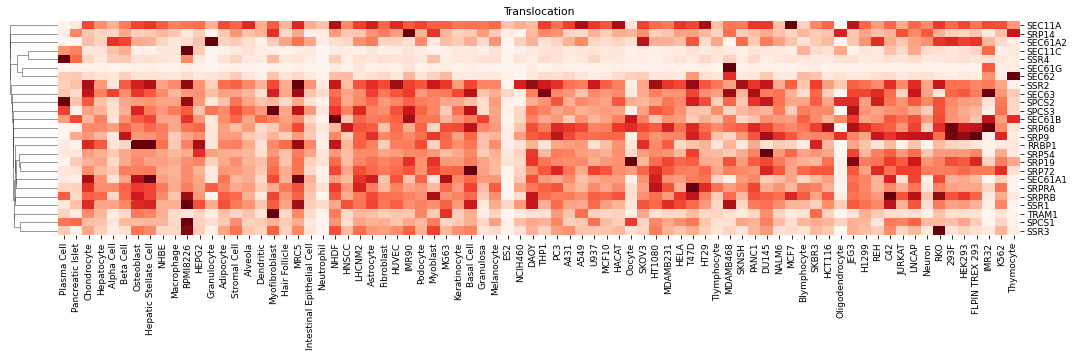

In [292]:
secre_cluster("Translocation",size=(15,5),scale=0,metric="euclidean",method="single")

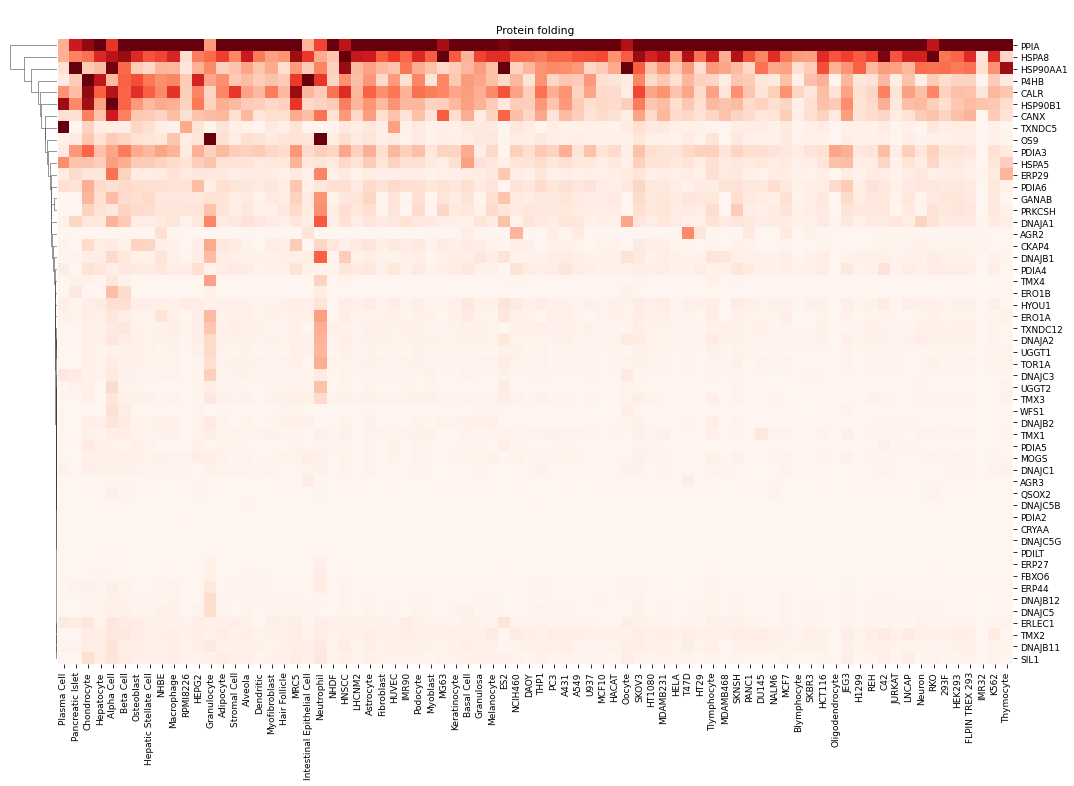

In [274]:
secre_cluster("Protein folding",size=(15,11),scale=1,metric="euclidean",method="single")

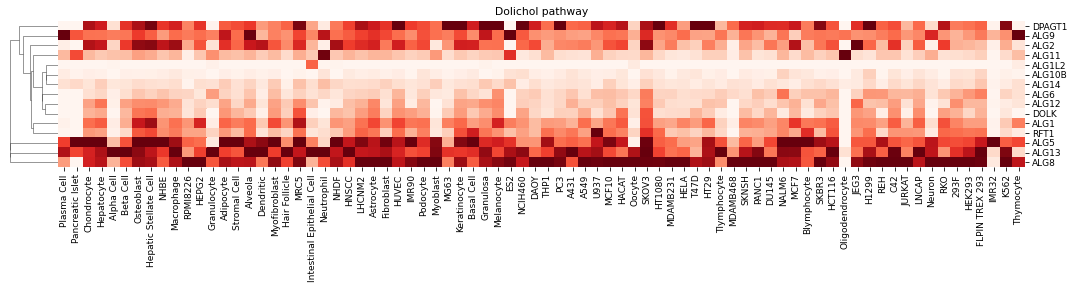

In [276]:
secre_cluster("Dolichol pathway",size=(15,4),scale=1,metric="euclidean",method="single")

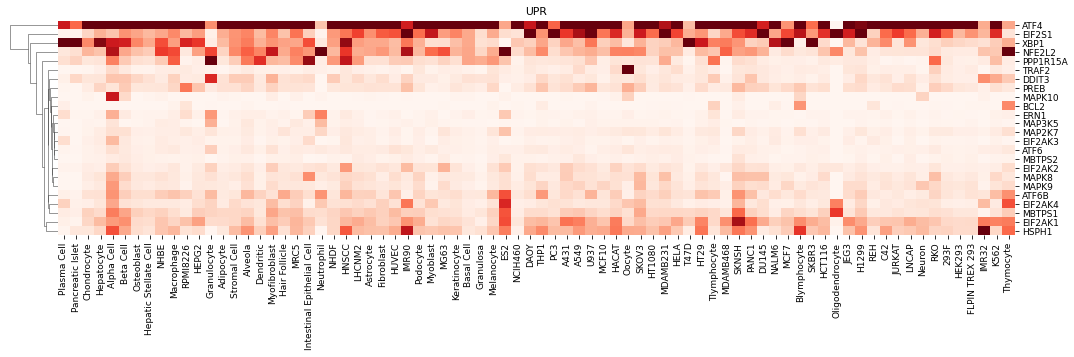

In [278]:
secre_cluster("UPR",size=(15,5),scale=1,metric="euclidean",method="single")

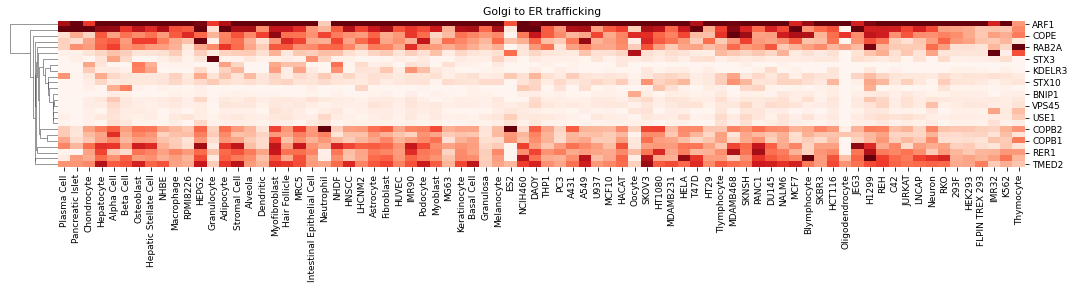

In [279]:
secre_cluster("Golgi to ER trafficking",size=(15,4),scale=1,metric="euclidean",method="single")

In [280]:
#for subsystem in set(secre_path["Subsystem"]):
#    secre_cluster(subsystem)

In [281]:
set(secre_path["Subsystem"])

{'Dolichol pathway',
 'ER calcium\xa0homeostasis',
 'ER glycosylation',
 'ER to Golgi Trafficking',
 'ERAD',
 'ERADC',
 'ERADL/M',
 'GPI biosynthesis',
 'Golgi glycosylation',
 'Golgi to ER trafficking',
 'Post-Golgi trafficking ',
 'Protein folding',
 'Trafficking regulation',
 'Translocation',
 'UPR',
 'intra-Golgi trafficking'}

In [282]:
subset_secretory=results.loc[secre_genes].T

In [283]:
subset_secretory

,ALG1,ALG10B,ALG11,ALG12,ALG13,ALG14,ALG1L2,ALG2,ALG5,ALG6,...,MAPK10,MAPK8,MAPK9,MBTPS1,MBTPS2,NFE2L2,PPP1R15A,PREB,TRAF2,XBP1
GSM741172,67.555008,6.754457,11.374541,32.059319,56.900768,7.436840,1.205118,25.693741,33.438507,11.668765,...,0.209219,21.511696,55.261112,51.254818,20.386301,80.102119,10.551440,32.145775,73.250923,66.630089
GSM741170,58.676785,8.125086,10.603242,30.204660,58.122894,11.446000,1.055281,22.420101,32.350353,14.161101,...,0.315566,23.526163,45.746853,62.505806,19.104986,86.897011,8.306351,34.846386,59.389065,57.257416
GSM741171,77.423752,5.312899,9.868777,33.855591,53.257854,5.334246,0.664633,27.929470,39.251011,11.807830,...,0.292115,19.528742,44.941437,45.789162,18.189554,62.453072,16.441891,28.370804,52.725353,78.502525
GSM907015,7.861546,3.562702,10.940756,12.762840,35.285229,7.069565,0.242174,26.756710,29.595095,10.645739,...,0.000000,26.378620,25.315340,30.045597,5.406755,123.627502,209.129410,20.785776,9.757392,158.151520
GSM1193921,604.402527,54.733994,105.467453,339.503326,426.594818,104.526321,0.000000,476.018433,538.408203,158.996017,...,0.000000,1384.837158,717.725830,551.787598,122.882416,1018.086914,612.483093,546.744019,308.626251,529.727112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM5577336,36.294746,6.787030,37.812576,9.434669,222.578445,15.872779,4.470778,39.666206,15.514875,17.130608,...,83.478462,34.680813,28.692894,104.315651,11.956158,107.804199,200.303085,36.801472,47.506702,77.232246
GSM5577337,44.331917,6.450800,40.464794,9.331850,232.045959,14.088659,4.024300,40.700340,17.083889,12.259092,...,54.210907,34.931522,31.175795,101.792427,13.215544,110.711090,191.407593,33.865967,30.734161,94.087440
GSM5580099,27.609259,2.768197,11.299513,14.918550,35.161087,4.679030,0.951821,26.687531,32.309021,6.791517,...,0.827059,9.852377,41.377640,48.938580,8.192971,107.217911,40.094120,46.359692,13.081557,107.701347
GSM5580100,28.271667,6.120058,10.327983,15.936593,33.098907,3.506677,1.991493,24.912334,36.671593,5.042555,...,0.000000,15.683266,44.184311,48.737541,8.283486,92.874809,32.454117,51.437748,18.134790,146.917053


In [284]:
from scipy.stats import spearmanr
corr_results=[]
for (index,row) in subset_secretory.T.iterrows():
    cval=spearmanr((si.secreted.values+1),(row.values+1))
    corr_results.append(cval)

In [610]:
corr_df=pd.DataFrame(corr_results)
corr_df.index=subset_secretory.columns.values
corr_df.columns=["spearman","pval"]

In [611]:
corr_df

,spearman,pval
ALG1,-0.147181,6.087463e-300
ALG10B,-0.290667,0.000000e+00
ALG11,-0.045271,9.349979e-30
ALG12,-0.161570,0.000000e+00
ALG13,-0.178611,0.000000e+00
...,...,...
NFE2L2,0.117168,4.176523e-190
PPP1R15A,0.191071,0.000000e+00
PREB,-0.224396,0.000000e+00
TRAF2,-0.257608,0.000000e+00


In [612]:
corr_df=corr_df.sort_values(by="spearman",ascending=False)

In [613]:
corr_df.head(20)

,spearman,pval
DNAJC3,0.349354,0.0
SEC24D,0.334485,0.0
SSR4,0.317873,0.0
CTSA,0.305461,0.0
HERPUD1,0.296604,0.0
RAB1A,0.269163,0.0
RAB3B,0.251285,0.0
OPTN,0.239708,0.0
ERO1B,0.230194,0.0
ERLEC1,0.214907,0.0


In [614]:
corr_df.tail(20)

,spearman,pval
PPIA,-0.310932,0.0
UBE2G2,-0.314226,0.0
PIGX,-0.314494,0.0
NET1,-0.315404,0.0
AP3M2,-0.318778,0.0
RNF5,-0.320883,0.0
SNAP47,-0.322809,0.0
LARGE2,-0.326321,0.0
TBC1D7,-0.329968,0.0
HSPA4L,-0.335068,0.0


In [615]:
corr_df.loc["XBP1"]

spearman    0.187555
pval        0.000000
Name: XBP1, dtype: float64

In [616]:
corr_df[corr_df["pval"]>0.05].index.values

array(['SSR3', 'HSPA2', 'ERP29', 'PDIA6', 'SPCS3', 'SEC61A1', 'CRYAB',
       'RAB44', 'CRYAA', 'MICAL1', 'ACAP1', 'RAB17', 'SYVN1', 'RAB43',
       'RAB29', 'TBC1D2', 'STX8', 'ERP27', 'DPM3', 'HAS2', 'HAS1',
       'FBXO6'], dtype=object)

In [617]:
corr_df["Subsystem"]=""

In [618]:
corr_df

,spearman,pval,Subsystem
DNAJC3,0.349354,0.0,
SEC24D,0.334485,0.0,
SSR4,0.317873,0.0,
CTSA,0.305461,0.0,
HERPUD1,0.296604,0.0,
...,...,...,...
MAPK9,-0.380771,0.0,
B4GALNT1,-0.393560,0.0,
DOLPP1,-0.394720,0.0,
KIF23,-0.403127,0.0,


In [642]:
for gene in corr_df.index.values:
    corr_df.loc[gene,"Subsystem"]=secre_path.loc[gene]["Subsystem"]

In [643]:
corr_df

,spearman,pval,Subsystem
DNAJC3,0.349354,0.0,Protein folding
SEC24D,0.334485,0.0,ER to Golgi Trafficking
SSR4,0.317873,0.0,Translocation
CTSA,0.305461,0.0,Golgi glycosylation
HERPUD1,0.296604,0.0,ERAD
...,...,...,...
MAPK9,-0.380771,0.0,UPR
B4GALNT1,-0.393560,0.0,Golgi glycosylation
DOLPP1,-0.394720,0.0,ER glycosylation
KIF23,-0.403127,0.0,Trafficking regulation


In [644]:
corr_df.drop(corr_df[corr_df["pval"]>0.05].index.values,inplace=True)

In [658]:
def corr_heat(subsystem,size=(2,6),font=12,cbar=True):
    sns.set(rc = {'figure.figsize':size},font_scale=1)
    sub_cluster=pd.DataFrame(corr_df[corr_df["Subsystem"]==subsystem]["spearman"].sort_values(ascending=False))
    #plt.rcParams.update({'font.size': 5})
    ax=sns.heatmap(sub_cluster,cmap="coolwarm",cbar=cbar,annot=True,vmin=-1,vmax=1,xticklabels=False)
    #ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 18)
    ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = font)
    plt.title(subsystem,loc='center')
    plt.savefig("{}_corr.svg".format(subsystem))

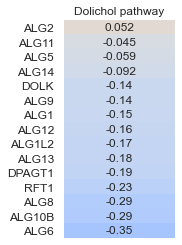

In [650]:
corr_heat("Dolichol pathway",size=(2,4),font=12,cbar=False)

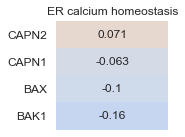

In [651]:
corr_heat("ER calcium\xa0homeostasis",size=(2,2),font=12,cbar=False)

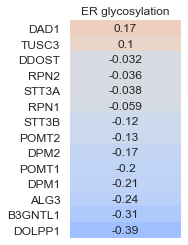

In [652]:
corr_heat("ER glycosylation",size=(2,4),font=12,cbar=False)

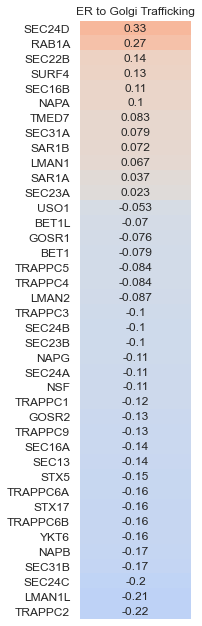

In [653]:
corr_heat("ER to Golgi Trafficking",size=(2,11),font=12,cbar=False)

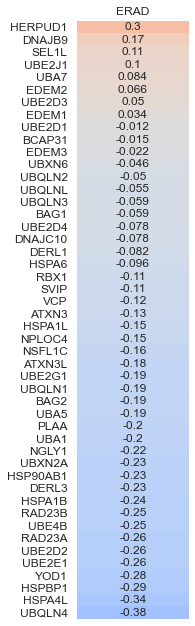

In [654]:
corr_heat("ERAD",size=(2,11),font=12,cbar=False)

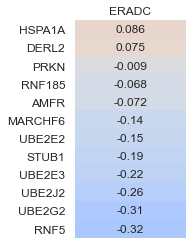

In [655]:
corr_heat("ERADC",size=(2,4),font=12,cbar=False)

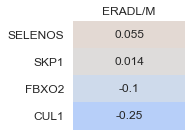

In [657]:
corr_heat("ERADL/M",size=(2,2),font=12,cbar=False)

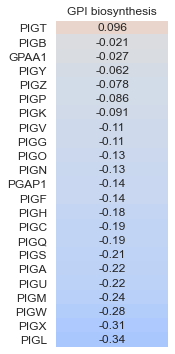

In [659]:
corr_heat("GPI biosynthesis",size=(2,6),font=12,cbar=False)

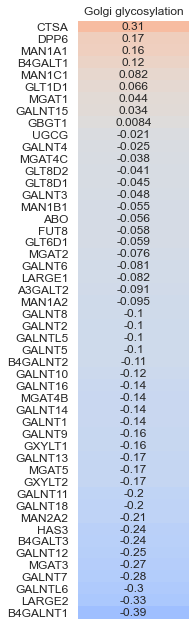

In [660]:
corr_heat("Golgi glycosylation",size=(2,11),font=12,cbar=False)

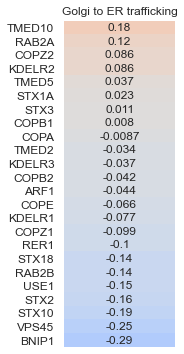

In [661]:
corr_heat("Golgi to ER trafficking",size=(2,6),font=12,cbar=False)

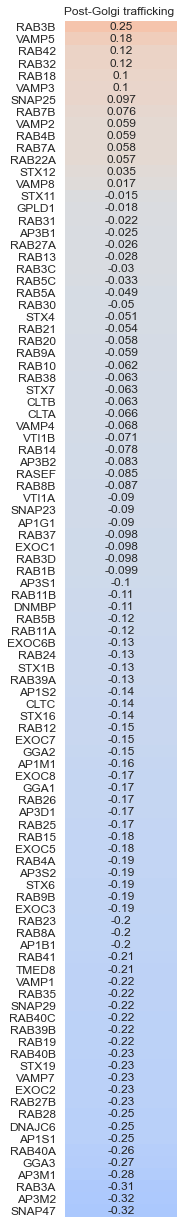

In [662]:
corr_heat("Post-Golgi trafficking ",size=(2,22),font=12,cbar=False)

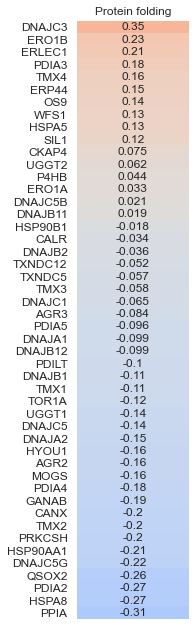

In [663]:
corr_heat("Protein folding",size=(2,11),font=12,cbar=False)

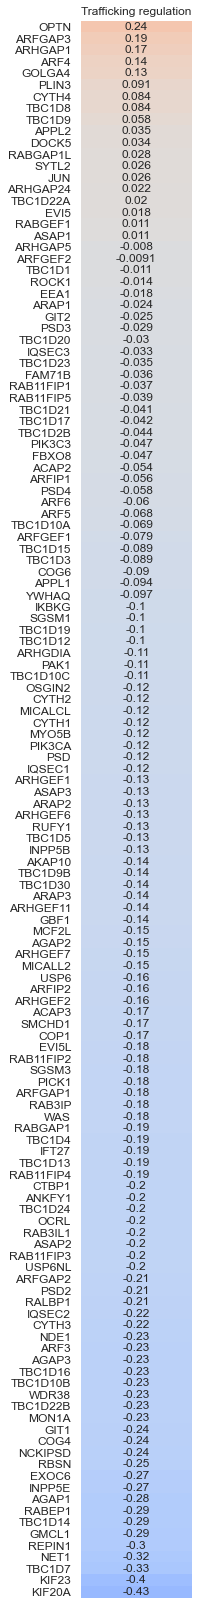

In [664]:
corr_heat("Trafficking regulation",size=(2,29),font=12,cbar=False)

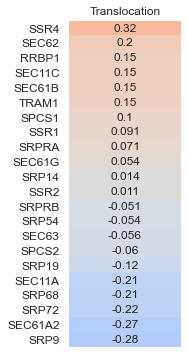

In [665]:
corr_heat("Translocation",size=(2,6),font=12,cbar=False)

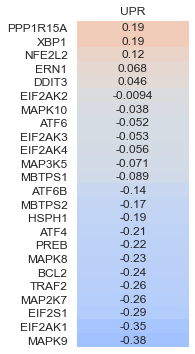

In [666]:
corr_heat("UPR",size=(2,6),font=12,cbar=False)

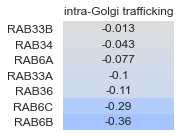

In [667]:
corr_heat("intra-Golgi trafficking",size=(2,2),font=12,cbar=False)

In [693]:
#subset only significantly correlated secretory pathway genes
significant=corr_df[(corr_df["spearman"]<=-0.3)|(corr_df["spearman"]>=0.3)].sort_values(by="spearman",ascending=False)

In [695]:
significant

,spearman,pval,Subsystem
DNAJC3,0.349354,0.0,Protein folding
SEC24D,0.334485,0.0,ER to Golgi Trafficking
SSR4,0.317873,0.0,Translocation
CTSA,0.305461,0.0,Golgi glycosylation
RAB3A,-0.305255,0.0,Post-Golgi trafficking
B3GNTL1,-0.309845,0.0,ER glycosylation
PPIA,-0.310932,0.0,Protein folding
UBE2G2,-0.314226,0.0,ERADC
PIGX,-0.314494,0.0,GPI biosynthesis
NET1,-0.315404,0.0,Trafficking regulation


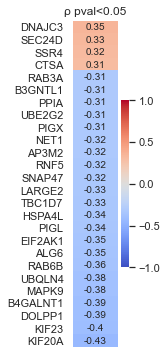

In [1006]:
plt.figure(figsize=(1,6))
subset=pd.DataFrame(significant["spearman"])
ax=sns.heatmap(subset,cmap="coolwarm",cbar=True,annot=True,vmin=-1,vmax=1,xticklabels=False,annot_kws={"size": 10})
plt.title("\u03C1 pval<0.05",loc='center')
plt.savefig("spearman_03.svg",bbox_inches='tight')

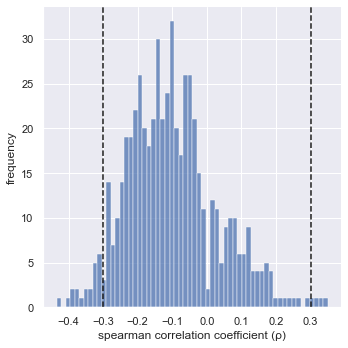

In [716]:
ax=sns.displot(corr_df.spearman,bins=60)
ax.set(xlabel='spearman correlation coefficient (\u03C1)',ylabel="frequency")
plt.axvline(0.3, color="k", linestyle="--")
plt.axvline(-0.3, color="k", linestyle="--")
plt.savefig("spearman_dist.svg")

In [ ]:
sorted_cluster.T.loc[significant.index.values]

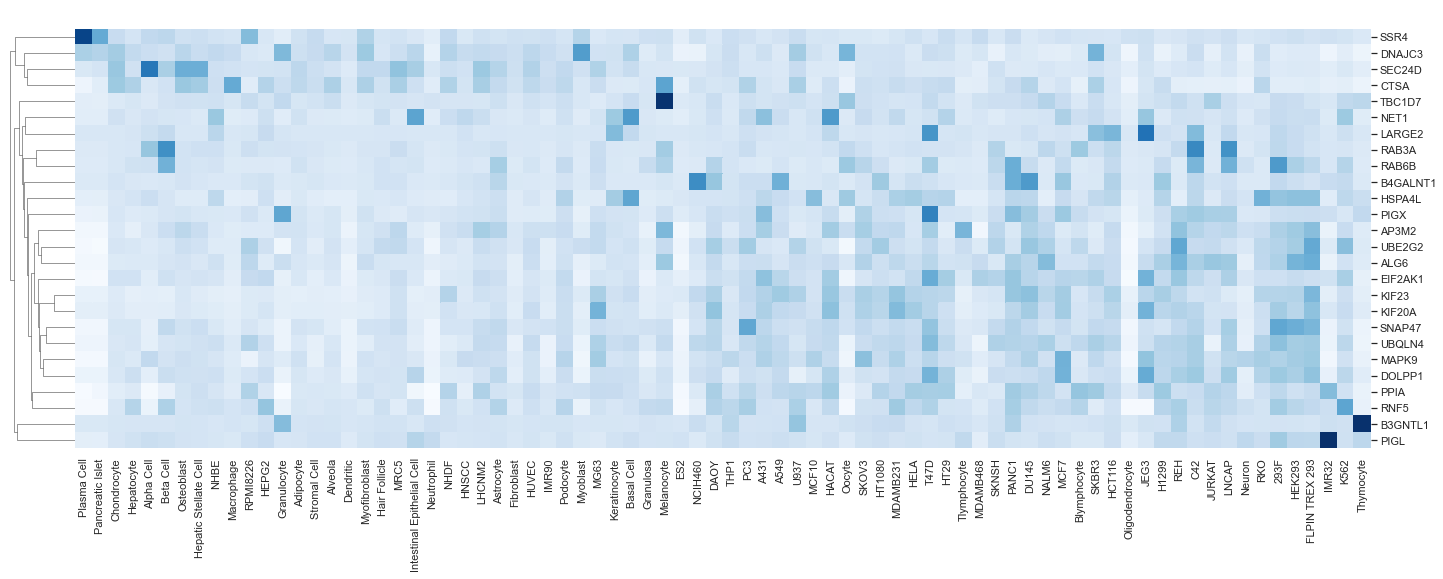

In [785]:
plt.rcParams.update({'font.size': 5})
sns.clustermap(sorted_cluster.T.loc[significant.index.values],figsize=(20,8),cmap="Blues",
               dendrogram_ratio=(0.05,0.05),z_score=0,cbar_pos=None,
               metric="euclidean",col_cluster=False,method="average"
              )
plt.savefig("significant_03_cluster.svg",bbox_inches='tight')

In [786]:
sample_types.shape

(62571, 3)

In [787]:
sample_types.head()

,percentage,cell_type,SI
GSM741172,4.511082,HELA,451.10822
GSM741170,4.583831,HELA,458.38312
GSM741171,4.867313,HELA,486.73132
GSM907015,14.701528,Macrophage,1470.15270
GSM1193921,2.805667,MDAMB231,280.56670


In [788]:
#getting GSM ID from each cell type
samples={}
for c_type in set(sample_types.cell_type.values):
    samples[c_type]=sample_types[sample_types["cell_type"]==c_type].index.values

In [789]:
samples.keys()

dict_keys(['Blymphocyte', '293F', 'Keratinocyte', 'ES2', 'Hepatic Stellate Cell', 'T47D', 'Adipocyte', 'IMR32', 'Basal Cell', 'PC3', 'MDAMB468', 'SKOV3', 'Thymocyte', 'LNCAP', 'NCIH460', 'THP1', 'Tlymphocyte', 'MG63', 'Astrocyte', 'Neutrophil', 'JURKAT', 'Granulosa', 'Podocyte', 'Oligodendrocyte', 'HNSCC', 'Myoblast', 'Alveola', 'RKO', 'HT1080', 'MCF7', 'K562', 'REH', 'H1299', 'HACAT', 'HELA', 'SKBR3', 'Dendritic', 'Granulocyte', 'HUVEC', 'Chondrocyte', 'Macrophage', 'HEPG2', 'Hair Follicle', 'Alpha Cell', 'MDAMB231', 'MCF10', 'A431', 'IMR90', 'Stromal Cell', 'SKNSH', 'A549', 'Oocyte', 'PANC1', 'Beta Cell', 'Plasma Cell', 'HCT116', 'NHDF', 'JEG3', 'Intestinal Epithelial Cell', 'Pancreatic Islet', 'FLPIN TREX 293', 'Myofibroblast', 'Fibroblast', 'MRC5', 'Hepatocyte', 'Melanocyte', 'U937', 'DU145', 'RPMI8226', 'Neuron', 'NHBE', 'LHCNM2', 'C42', 'NALM6', 'HT29', 'Osteoblast', 'HEK293', 'DAOY'])

In [790]:
len(samples["Oocyte"])

139

In [791]:
len(samples["ES2"])

569

In [792]:
len(samples["SKOV3"])

79

In [793]:
len(samples["Granulosa"])

112

In [794]:
ovary_cells=list(samples["Oocyte"])+list(samples["ES2"])+list(samples["SKOV3"])+list(samples["Granulosa"])

In [795]:
len(ovary_cells)

899

In [796]:
pd.DataFrame(list(samples["Plasma Cell"])).to_csv("plasma_cell.csv",index=None)

In [797]:
pd.DataFrame(list(samples["HEK293"])).to_csv("HEK293.csv",index=None)

In [798]:
pd.DataFrame(list(samples["Alpha Cell"])).to_csv("alpha_cell.csv",index=None)

In [799]:
pd.DataFrame(list(samples["Thymocyte"])).to_csv("thymocyte.csv",index=None)

In [800]:
pd.DataFrame(list(samples["Pancreatic Islet"])).to_csv("pancreatic.csv",index=None)

In [801]:
pd.DataFrame(ovary_cells).to_csv("ovary_cells_v10.csv",index=None)

In [802]:
ovary_cells=pd.read_csv("ovary_cells_v10.csv")

In [142]:
total_depth=results.sum(axis=0)

In [803]:
def max_trans(cell_query):
    mean=((results.loc[:,results.columns.isin(list(samples[cell_query]))]/results.loc[:,results.columns.isin(list(samples[cell_query]))].sum(axis=0))*100).mean(axis=1)
    median=((results.loc[:,results.columns.isin(list(samples[cell_query]))]/results.loc[:,results.columns.isin(list(samples[cell_query]))].sum(axis=0))*100).median(axis=1)
    mad=((results.loc[:,results.columns.isin(list(samples[cell_query]))]/results.loc[:,results.columns.isin(list(samples[cell_query]))].sum(axis=0))*100).mad(axis=1)
    df=pd.DataFrame(mean,columns=["mean"])
    df["median"]=median
    df["mad"]=mad
    return df.sort_values(by="mean",ascending=False)




In [804]:
plasma=max_trans("Plasma Cell")

In [805]:
plasma.head(10)

,mean,median,mad
IGKC,11.605271,13.993358,10.600442
IGLC2,8.555785,0.031240,11.460039
IGKJ2,3.823569,0.000000,6.288269
IGKJ4,3.647002,0.000000,6.003378
IGKJ1,3.003703,0.000000,4.991242
IGLV2-14,2.566689,0.000000,4.603127
IGHJ5,2.430748,0.000000,3.874617
IGLV1-40,2.429919,0.000000,4.447707
IGLC3,2.282450,0.015420,3.649214
IGLV1-44,2.231380,0.000000,4.070321


In [806]:
list(plasma["mean"][0:4].index.values)

['IGKC', 'IGLC2', 'IGKJ2', 'IGKJ4']

In [807]:
ab_table=max_trans("Plasma Cell")
sizes=list(ab_table["mean"][0:5])+[ab_table["mean"][5:].sum()]
other="other \n%s" %ab_table["mean"][5:].sum()

In [808]:
other

'other \n69.36467'

In [838]:
def prot_abundance(cell_type):
    plt.figure(figsize=(10,3))
    ab_table=max_trans(cell_type)
    sizes=list(ab_table["mean"][0:5])+[ab_table["mean"][5:].sum()]
    other=["other %.2f%%" %ab_table["mean"][5:].sum()]
    label=list(ab_table["mean"][0:5].index.values)+other
    color=['red','blue','green','pink','orange','grey']
    squarify.plot(sizes=sizes, label=label,color=color, alpha=0.3, text_kwargs={'fontsize':14})
    plt.axis('off')
    name=cell_type + "_abundance.svg"
    plt.savefig(name)
    plt.show()

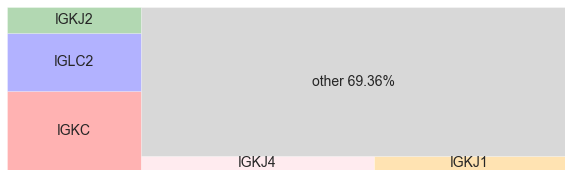

In [839]:
prot_abundance("Plasma Cell")

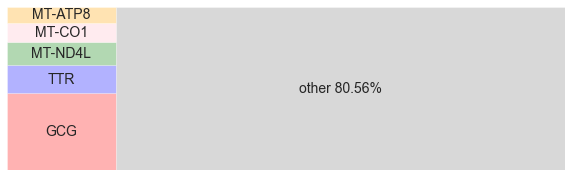

In [840]:
prot_abundance("Alpha Cell")

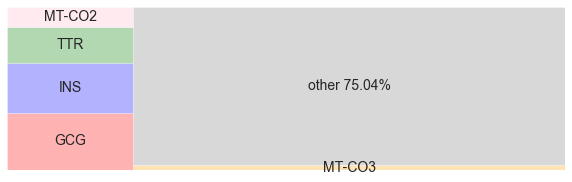

In [841]:
prot_abundance("Pancreatic Islet")

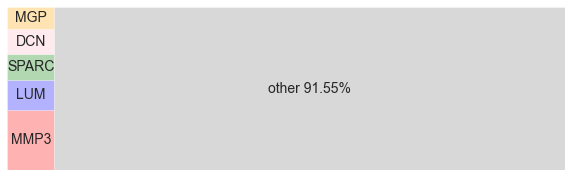

In [842]:
prot_abundance("Chondrocyte")

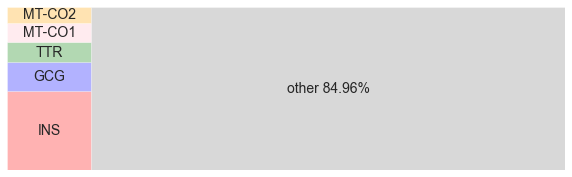

In [843]:
prot_abundance("Beta Cell")

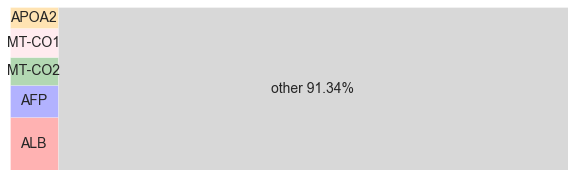

In [844]:
prot_abundance("Hepatocyte")

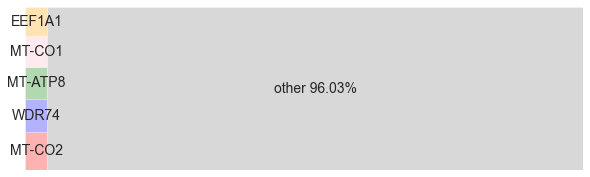

In [845]:
prot_abundance("HEK293")

In [848]:
plt.rcParams['figure.figsize'] = [8.0, 6.0]

In [846]:
def gene_cell_dist(cell_type,gene):
    cell_query=cell_type
    percentage=(results.loc[:,results.columns.isin(list(samples[cell_query]))]/results.loc[:,results.columns.isin(list(samples[cell_query]))].sum(axis=0))*100
    percentage.loc[gene].hist(bins=100)


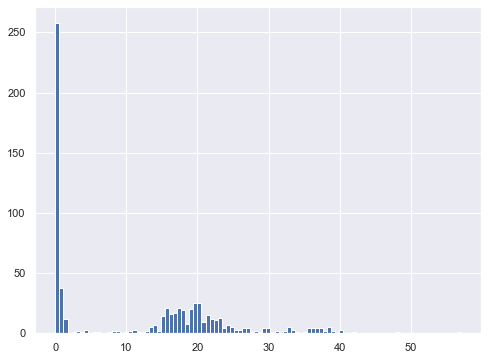

In [849]:
gene_cell_dist("Plasma Cell","IGKC")

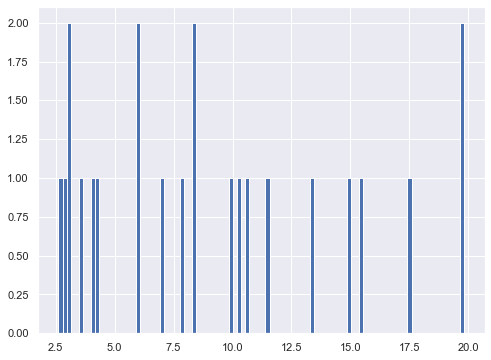

In [850]:
gene_cell_dist("Alpha Cell","GCG")

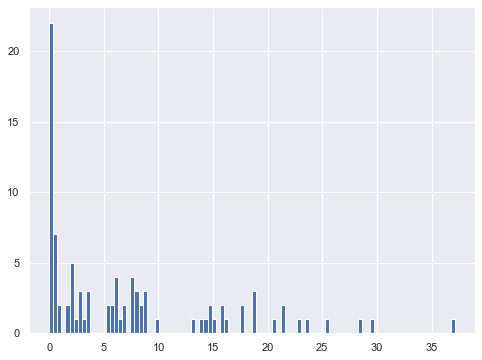

In [851]:
gene_cell_dist("Beta Cell","INS")

In [852]:
def top_genes(cell_type,number):
    return max_trans(cell_type).sort_values(by="mean",ascending=False).head(number)["mean"]

In [853]:
top_genes("Plasma Cell",5).sum()

30.63533

In [854]:
top_genes("Alpha Cell",5).sum()

19.437943

In [855]:
top_genes("Pancreatic Islet",5).sum()

24.95652

In [856]:
top_genes("Chondrocyte",5).sum()

8.452797

In [857]:
top_genes("Beta Cell",5).sum()

15.037029

In [858]:
top_genes("Hepatocyte",5).sum()

8.656668

In [859]:
top_genes("HEK293",5).sum()

3.9719038

In [860]:
top_genes("Plasma Cell",5)

IGKC     11.605271
IGLC2     8.555785
IGKJ2     3.823569
IGKJ4     3.647002
IGKJ1     3.003703
Name: mean, dtype: float32

In [861]:
top_genes("Alpha Cell",5)

GCG        9.126500
TTR        3.313353
MT-ND4L    2.756031
MT-CO1     2.263903
MT-ATP8    1.978155
Name: mean, dtype: float32

In [862]:
top_genes("Beta Cell",5)

INS       7.239939
GCG       2.682491
TTR       1.863791
MT-CO1    1.782716
MT-CO2    1.468093
Name: mean, dtype: float32

In [863]:
top_genes("Pancreatic Islet",5)

GCG       7.984308
INS       6.933420
TTR       4.886484
MT-CO2    2.807638
MT-CO3    2.344669
Name: mean, dtype: float32

In [864]:
top_genes("Hepatocyte",5)

ALB       2.826577
AFP       1.662149
MT-CO2    1.523832
MT-CO1    1.522895
APOA2     1.121214
Name: mean, dtype: float32

In [865]:
top_genes("HEK293",5)

MT-CO2     0.924076
WDR74      0.806844
MT-ATP8    0.780796
MT-CO1     0.736678
EEF1A1     0.723509
Name: mean, dtype: float32

In [866]:
top_genes("Adipocyte",5)

EEF1A1    1.144987
MT-CO1    0.872587
SPARC     0.823307
FABP4     0.814348
FTH1      0.782626
Name: mean, dtype: float32

In [867]:
def top_genes(cell_type):
    return max_trans(cell_type).sort_values(by="mean",ascending=False).head(5)

In [868]:
top_genes("Hepatocyte")

,mean,median,mad
ALB,2.826577,1.674023,2.188336
AFP,1.662149,0.001290,2.619830
MT-CO2,1.523832,1.427976,0.739208
MT-CO1,1.522895,1.375492,0.799826
APOA2,1.121214,0.402386,1.211099


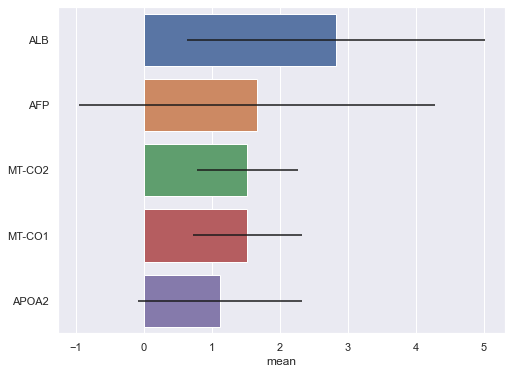

In [869]:
hep=top_genes("Hepatocyte")
ax = sns.barplot(x="mean", y=hep.index.values,data=hep,xerr=hep["mad"], capsize=1)

In [870]:
sample_types.head()

,percentage,cell_type,SI
GSM741172,4.511082,HELA,451.10822
GSM741170,4.583831,HELA,458.38312
GSM741171,4.867313,HELA,486.73132
GSM907015,14.701528,Macrophage,1470.15270
GSM1193921,2.805667,MDAMB231,280.56670


In [871]:
sample_types.shape

(62571, 3)

In [872]:
sample_types.loc["GSM741172","cell_type"]

'HELA'

In [873]:
sample_types.loc[sample_types.cell_type=="Plasma Cell"].sort_values(by="percentage",ascending=False)

,percentage,cell_type,SI
GSM3350577,88.582770,Plasma Cell,8858.2770
GSM2197433,88.325290,Plasma Cell,8832.5280
GSM3350601,88.290110,Plasma Cell,8829.0110
GSM2197432,88.244896,Plasma Cell,8824.4890
GSM3350618,88.022560,Plasma Cell,8802.2560
...,...,...,...
GSM4419546,28.245476,Plasma Cell,2824.5476
GSM4565594,28.182550,Plasma Cell,2818.2551
GSM3351115,27.289290,Plasma Cell,2728.9290
GSM4419567,27.163960,Plasma Cell,2716.3960


In [874]:
sample_types.sort_values(by="percentage",ascending=False).head(10)

,percentage,cell_type,SI
GSM3350577,88.582770,Plasma Cell,8858.277
GSM2197433,88.325290,Plasma Cell,8832.528
GSM3350601,88.290110,Plasma Cell,8829.011
GSM2197432,88.244896,Plasma Cell,8824.489
GSM3350618,88.022560,Plasma Cell,8802.256
GSM2197434,87.237946,Plasma Cell,8723.795
GSM2171215,87.135230,Plasma Cell,8713.523
GSM2197431,85.720730,Plasma Cell,8572.073
GSM3350606,85.482080,Plasma Cell,8548.208
GSM3350605,85.236130,Plasma Cell,8523.613


In [875]:
#only to normalize
#x=np.asarray(secre_cell_type2.values)
#scaler=preprocessing.MinMaxScaler()
#x_scaled=scaler.fit_transform(x)
#secre_cell_type2=pd.DataFrame(x_scaled)

In [876]:
sample_types.groupby(by=["cell_type"])["percentage"].median().sort_values(ascending=False)

cell_type
Plasma Cell         57.793637
Pancreatic Islet    28.639656
Chondrocyte         27.233430
Hepatocyte          21.808576
Alpha Cell          20.240854
                      ...    
HEK293               1.849148
FLPIN TREX 293       1.835139
IMR32                1.785176
K562                 1.753976
Thymocyte            1.212715
Name: percentage, Length: 78, dtype: float64

In [877]:
my_order = sample_types.groupby(by=["cell_type"])["percentage"].median().sort_values(ascending=False).index

In [906]:
percentage=0.2

In [907]:
top_percent=int(len(sample_types)*percentage)

In [908]:
top_percent

12514

In [190]:
high_producers=sample_types[sample_types["cell_type"]=="Plasma Cell"]

In [191]:
low_producers=sample_types[sample_types["cell_type"]=="HEK293"]

In [909]:
high_producers=sample_types.sort_values(by="percentage",ascending=False).iloc[0:top_percent]

In [910]:
low_producers=sample_types.sort_values(by="percentage",ascending=False).iloc[-top_percent:]

In [911]:
high_producers

,percentage,cell_type,SI
GSM3350577,88.582770,Plasma Cell,8858.2770
GSM2197433,88.325290,Plasma Cell,8832.5280
GSM3350601,88.290110,Plasma Cell,8829.0110
GSM2197432,88.244896,Plasma Cell,8824.4890
GSM3350618,88.022560,Plasma Cell,8802.2560
...,...,...,...
GSM3505274,13.998323,Fibroblast,1399.8324
GSM2138689,13.997663,HEPG2,1399.7664
GSM2050864,13.996975,Fibroblast,1399.6975
GSM3465127,13.996902,Fibroblast,1399.6902


In [912]:
low_producers

,percentage,cell_type,SI
GSM3162716,2.332318,Oligodendrocyte,233.231860
GSM2678863,2.332296,Fibroblast,233.229610
GSM3349083,2.332143,K562,233.214280
GSM5136491,2.331984,MCF7,233.198430
GSM3633344,2.331892,JURKAT,233.189210
...,...,...,...
GSM4776218,0.019147,Fibroblast,1.914654
GSM2071351,0.015702,NCIH460,1.570199
GSM4776266,0.013098,Fibroblast,1.309766
GSM2071350,0.010780,NCIH460,1.077986


In [913]:
high_producers.to_csv("high_producers_v11_20_TPM.csv")

In [914]:
low_producers.to_csv("low_producers_v11_20_TPM.csv")

In [915]:
results.head()

,GSM741172,GSM741170,GSM741171,GSM907015,GSM1193921,GSM1098188,GSM1193928,GSM1048186,GSM1216828,GSM1241249,...,GSM5572862,GSM5577332,GSM5577333,GSM5577334,GSM5577335,GSM5577336,GSM5577337,GSM5580099,GSM5580100,GSM5580102
A1BG,1.514984,1.316501,0.945544,12.863701,71.141045,0.738105,134.292114,10.272301,2.855723,0.000000,...,0.778685,6.074946,6.227352,5.103860,8.809099,7.493229,7.746690,42.761230,35.295048,35.235378
A1CF,0.208822,0.199274,0.138544,0.058604,0.301775,0.034464,1.374310,0.267306,13.903001,0.000000,...,0.163493,0.129097,0.266828,0.162259,0.165147,0.261044,0.246418,0.013703,0.031029,0.020903
A2M,61.154045,141.594360,62.881958,109.156868,0.000000,313.137146,0.000000,216.393066,22.510412,0.000000,...,0.000000,0.130720,0.426572,0.000000,0.507422,0.200596,0.000000,314.406342,426.812805,311.372803
A2ML1,0.373835,0.262869,0.266668,0.799892,0.655797,0.109945,0.366945,4.065595,0.190527,1.748747,...,0.112173,1.403640,2.326312,2.850472,3.334096,3.415315,2.629406,0.064991,0.255675,0.041696
A3GALT2,0.722773,1.094620,0.645631,0.000000,0.000000,0.458957,0.000000,4.969500,0.000000,0.000000,...,0.000000,0.457722,0.104935,0.179656,0.000000,0.313955,0.304647,0.000000,0.000000,0.151392


In [933]:
somatome=results.drop(secretome_included).copy()

In [934]:
somatome.head()

,GSM741172,GSM741170,GSM741171,GSM907015,GSM1193921,GSM1098188,GSM1193928,GSM1048186,GSM1216828,GSM1241249,...,GSM5572862,GSM5577332,GSM5577333,GSM5577334,GSM5577335,GSM5577336,GSM5577337,GSM5580099,GSM5580100,GSM5580102
A1CF,0.208822,0.199274,0.138544,0.058604,0.301775,0.034464,1.374310,0.267306,13.903001,0.000000,...,0.163493,0.129097,0.266828,0.162259,0.165147,0.261044,0.246418,0.013703,0.031029,0.020903
A3GALT2,0.722773,1.094620,0.645631,0.000000,0.000000,0.458957,0.000000,4.969500,0.000000,0.000000,...,0.000000,0.457722,0.104935,0.179656,0.000000,0.313955,0.304647,0.000000,0.000000,0.151392
A4GALT,36.032150,37.229839,33.279217,1.015697,142.980347,36.433231,183.780090,10.563320,2.462949,0.701296,...,18.059050,5.627535,7.101623,7.093668,7.457928,5.663228,7.826350,0.033709,0.000000,0.000000
A4GNT,0.030812,0.000000,0.000000,1.430780,0.492563,0.048803,0.495588,0.000000,0.030563,0.000000,...,0.000000,0.080976,0.055640,0.047948,0.247546,0.278913,0.000000,0.389952,0.440706,0.318720
AAAS,53.506466,53.790775,47.527954,25.903215,273.925598,45.429768,232.081818,51.678558,29.881355,19.422600,...,42.163074,101.262016,90.680084,89.193260,108.643570,118.603142,114.563354,43.215916,49.570923,31.762648


In [935]:
somatome.shape

(18952, 62571)

In [936]:
from scipy.stats import spearmanr
corr_results_somatome=[]
for (index,row) in somatome.iterrows():
    cval=spearmanr((si.secreted.values+1),(row.values+1))
    corr_results_somatome.append(cval)

/home/manuel/anaconda3/envs/ds/lib/python3.9/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


In [937]:
corr_df_somatome=pd.DataFrame(corr_results_somatome)
corr_df_somatome.index=somatome.index.values
corr_df_somatome.columns=["spearman","pval"]

In [938]:
corr_df_somatome.sort_values(by="spearman",ascending=False).head(10)

,spearman,pval
HLA-A,0.561026,0.0
CD99,0.499683,0.0
TMEM59,0.473508,0.0
FTL,0.462728,0.0
CD63,0.450270,0.0
HLA-C,0.450109,0.0
HLA-B,0.446690,0.0
ELL2,0.445708,0.0
ALDH1A1,0.426935,0.0
RIN2,0.415094,0.0


In [940]:
corr_df_somatome.sort_values(by="spearman",ascending=False).tail(10)

,spearman,pval
BIRC5,-0.552842,0.0
CENPU,-0.554258,0.0
DHFR,-0.559923,0.0
RANBP1,-0.560315,0.0
NASP,-0.562539,0.0
GINS2,-0.574408,0.0
MCM7,-0.583935,0.0
ZIC2,-0.589557,0.0
EZH2,-0.595682,0.0
MIR4485,NaN,NaN


In [972]:
corr_df_somatome.sort_values(by="spearman",ascending=False).to_csv("spearman_somatosome.csv")

In [975]:
corr_df.sort_values(by="spearman",ascending=False).to_csv("spearman_secre_pathway.csv")

In [1013]:
#subset only significantly correlated secretory pathway genes
significant_somatome=corr_df_somatome[(corr_df_somatome["spearman"]<=-0.5)|(corr_df_somatome["spearman"]>=0.5)].sort_values(by="spearman",ascending=False)

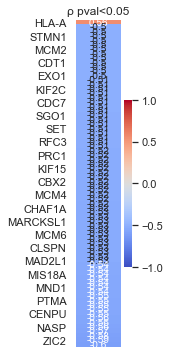

In [1014]:
subset=pd.DataFrame(significant_somatome["spearman"])
plt.figure(figsize=(1,6))
ax=sns.heatmap(subset,cmap="coolwarm",cbar=True,annot=True,vmin=-1,vmax=1,xticklabels=False,annot_kws={"size": 10})
plt.title("\u03C1 pval<0.05",loc='center')
plt.savefig("spearman_somatome_03.svg",bbox_inches='tight')

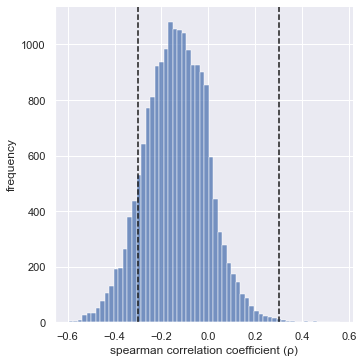

In [1015]:
ax=sns.displot(corr_df_somatome.spearman,bins=60)
ax.set(xlabel='spearman correlation coefficient (\u03C1)',ylabel="frequency")
plt.axvline(0.3, color="k", linestyle="--")
plt.axvline(-0.3, color="k", linestyle="--")
plt.savefig("spearman_dist_somatome.svg")

In [980]:
from scipy.stats import pearsonr
corr_results_somatome_pe=[]
for (index,row) in somatome.iterrows():
    cval=pearsonr((si.secreted.values+1),(row.values+1))
    corr_results_somatome_pe.append(cval)

/home/manuel/anaconda3/envs/ds/lib/python3.9/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [987]:
corr_df_somatome_pe=pd.DataFrame(corr_results_somatome_pe)
corr_df_somatome_pe.index=somatome.index.values
corr_df_somatome_pe.columns=["pearson","pval"]

In [988]:
corr_df_somatome_pe.sort_values(by="pearson",ascending=False).head(10)

,pearson,pval
SSR4,0.576539,0.0
CPE,0.442491,0.0
CD99,0.442042,0.0
SCGN,0.429483,0.0
ELAPOR1,0.410448,0.0
CYSTM1,0.388359,0.0
PTPRN,0.388112,0.0
TM4SF4,0.381653,0.0
TMEM176B,0.373648,0.0
RNASEK,0.362324,0.0


In [989]:
corr_df_somatome_pe.sort_values(by="pearson",ascending=False).tail(10)

,pearson,pval
RPL38,-0.276505,0.0
SAE1,-0.278395,0.0
PA2G4,-0.278793,0.0
NME1,-0.279248,0.0
RPSA,-0.280947,0.0
HNRNPA1,-0.283976,0.0
TUBB,-0.291141,0.0
LDHB,-0.292855,0.0
JPT1,-0.301878,0.0
MIR4485,NaN,NaN


In [991]:
corr_df_somatome_pe.sort_values(by="pearson",ascending=False).to_csv("pearson_somatome.csv")

In [993]:
#subset only significantly correlated secretory pathway genes
significant_somatome_pe=corr_df_somatome_pe[(corr_df_somatome_pe["pearson"]<=-0.3)|(corr_df_somatome_pe["pearson"]>=0.3)].sort_values(by="pearson",ascending=False)

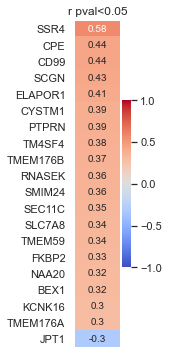

In [1010]:
subset=pd.DataFrame(significant_somatome_pe["pearson"])
plt.figure(figsize=(1,6))
ax=sns.heatmap(subset,cmap="coolwarm",cbar=True,annot=True,vmin=-1,vmax=1,xticklabels=False,annot_kws={"size": 10})
plt.title("r pval<0.05",loc='center')
plt.savefig("pearson_somatome_03.svg",bbox_inches='tight')

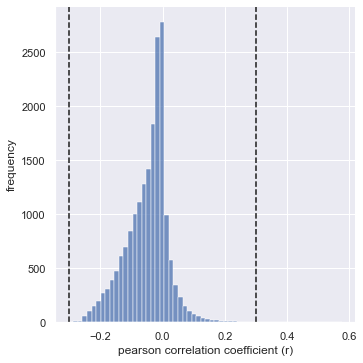

In [1017]:
ax=sns.displot(corr_df_somatome_pe.pearson,bins=60)
ax.set(xlabel='pearson correlation coefficient (r)',ylabel="frequency")
plt.axvline(0.3, color="k", linestyle="--")
plt.axvline(-0.3, color="k", linestyle="--")
plt.savefig("pearson_dist_somatome.svg")

# SI index distribution among cell types

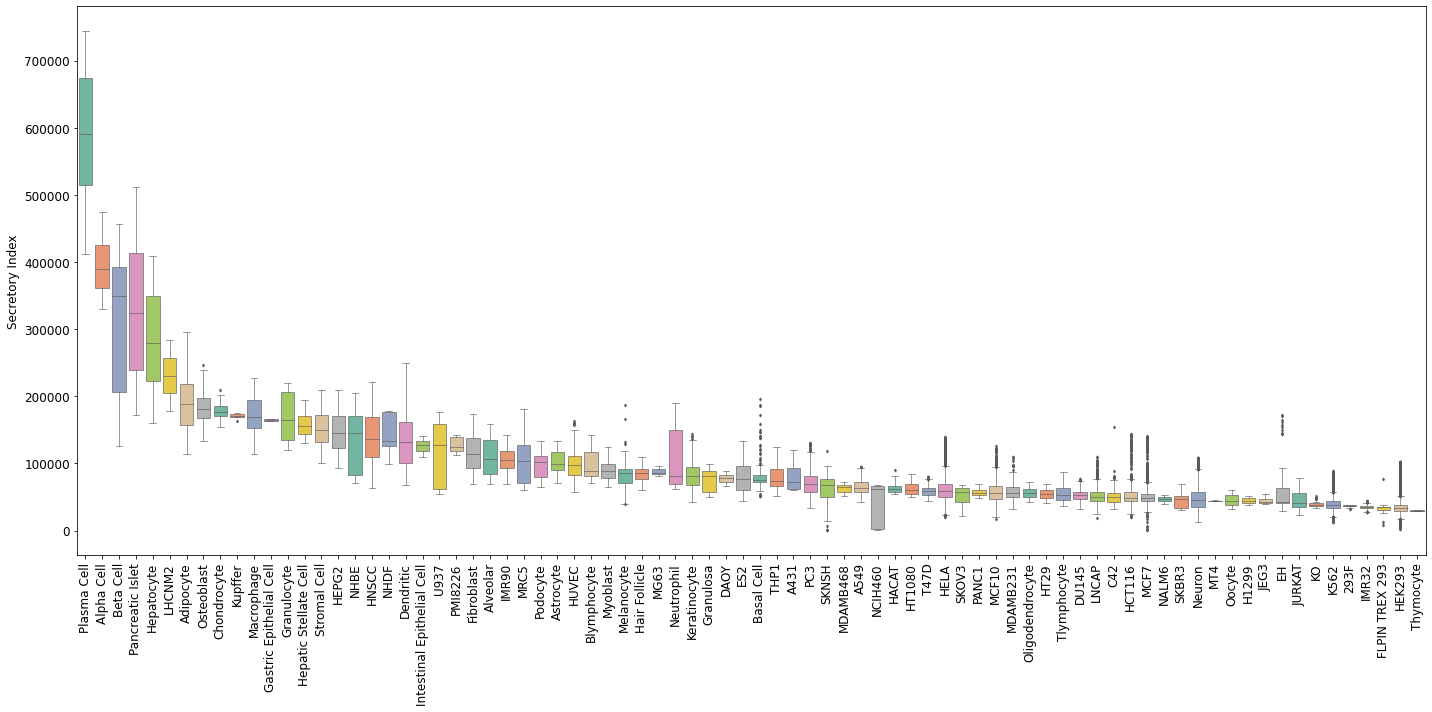

In [102]:
plt.figure(figsize=(20, 10))
ax=sns.boxplot(x="cell_type",y="secreted",data=secre_cell_type.sort_values(by="secreted",ascending=False), linewidth=0.6,palette="Set2",order=my_order,fliersize=2)
ax.set_xlabel("",fontsize=23)
ax.set_ylabel("Secretory Index",fontsize=12)
ax.tick_params(labelsize=12)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.tight_layout()
ax.figure.savefig("si_TPM.svg",bbo_inches="tight")

In [103]:
#normalize values
secre_cell_type.groupby(by=["cell_type"])["secreted"].median().sort_values(ascending=False)[0]

590190.0

In [104]:
secre_cell_type2=secre_cell_type.copy()

In [105]:
secre_cell_type2["secreted"]=(secre_cell_type2["secreted"]/secre_cell_type.groupby(by=["cell_type"])["secreted"].median().sort_values(ascending=False)[0])*100



In [106]:
secre_cell_type2.groupby(by=["cell_type"])["secreted"].median().sort_values(ascending=False)

cell_type
Plasma Cell         100.000000
Alpha Cell           65.887172
Beta Cell            59.278707
Pancreatic Islet     54.842339
Hepatocyte           47.422525
                       ...    
293F                  6.243413
IMR32                 5.871499
FLPIN TREX 293        5.819312
HEK293                5.770684
Thymocyte             5.048628
Name: secreted, Length: 80, dtype: float64

In [107]:
my_order = secre_cell_type2.groupby(by=["cell_type"])["secreted"].median().sort_values(ascending=False).index

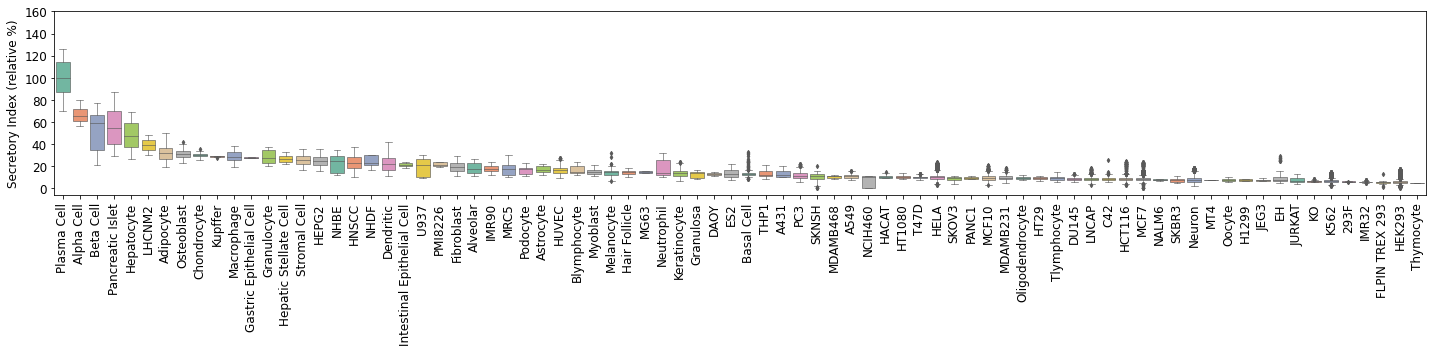

In [108]:
plt.figure(figsize=(20, 5))
ax=sns.boxplot(x="cell_type",y="secreted",data=secre_cell_type2.sort_values(by="secreted",ascending=False), linewidth=0.6,palette="Set2",order=my_order,fliersize=3,width=0.8)
ax.set_xlabel("",fontsize=23)
ax.set_ylabel("Secretory Index (relative %)",fontsize=12)
ax.set_yticks(np.arange(0, 180, 20))
ax.tick_params(labelsize=12)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
#plt.setp(ax.get_xticklabels(), rotation=45)
plt.tight_layout()
ax.figure.savefig("si_TPM_std.svg",bbo_inches="tight")

In [109]:
n_samples=sample_types.groupby("type").count()
n_samples.columns=["count"]
n_samples.head()

,count
type,
293F,53
A431,25
A549,758
Adipocyte,180
Alpha Cell,14


In [110]:
n_samples["type"]=n_samples.index

In [111]:
n_samples.head()

,count,type
type,,
293F,53,293F
A431,25,A431
A549,758,A549
Adipocyte,180,Adipocyte
Alpha Cell,14,Alpha Cell


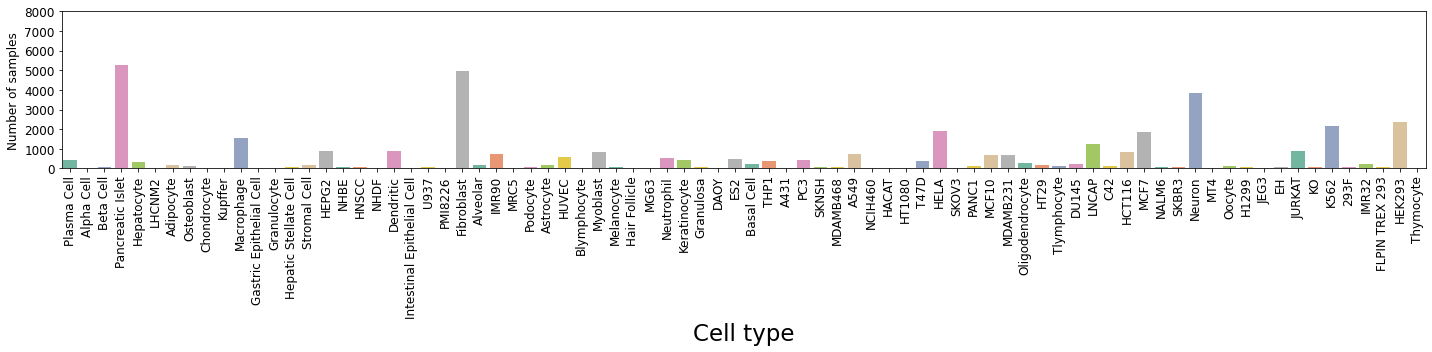

In [112]:
plt.figure(figsize=(20, 5))
ax=sns.barplot(data=n_samples,x=n_samples.index.values,y=n_samples["count"], linewidth=0.6,palette="Set2",order=my_order)
ax.set_xlabel("Cell type",fontsize=23)
ax.set_ylabel("Number of samples",fontsize=12)
ax.set_yticks(np.arange(0, 9000, 1000))
ax.tick_params(labelsize=12)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.tight_layout()
ax.figure.savefig("si_TPM_nsamps.svg",bbo_inches="tight")